# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 13 March, 2023, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/137_o3OVj8Y5C8-PCQlX-RpmHh439qe9U?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Save the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# 1. Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

In [1]:
#Import Pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading data from csv file to pandas dataframe
df = pd.read_csv("covid19-cdc-22208232.csv", delimiter = ",")

In [3]:
#As observed below, the data has 20000 rows and 19 columns(or features)
df.shape

(20000, 19)

In [4]:
df


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2022-01,NY,36.0,KINGS,36047.0,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
1,2021-12,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
2,2020-08,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
3,2020-05,FL,12.0,HILLSBOROUGH,12057.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2021-09,NC,37.0,WAKE,37183.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-07,OR,41.0,DOUGLAS,41019.0,18 to 49 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19996,2021-12,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19997,2022-05,NC,37.0,WAKE,37183.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,NaN
19998,2022-04,ME,23.0,YORK,23031.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Yes,Laboratory-confirmed case,Asymptomatic,No,Missing,No,NaN


## Printing the First 5 Rows and last 5 rows

In [5]:
#This command returns the first 5 rows in the table
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2022-01,NY,36.0,KINGS,36047.0,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
1,2021-12,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
2,2020-08,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
3,2020-05,FL,12.0,HILLSBOROUGH,12057.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2021-09,NC,37.0,WAKE,37183.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN


In [6]:
#This command returns the last 5 rows in the table
df.tail(5)


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19995,2021-07,OR,41.0,DOUGLAS,41019.0,18 to 49 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19996,2021-12,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19997,2022-05,NC,37.0,WAKE,37183.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,NaN
19998,2022-04,ME,23.0,YORK,23031.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Yes,Laboratory-confirmed case,Asymptomatic,No,Missing,No,NaN
19999,2020-10,TX,48.0,NaN,NaN,18 to 49 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN




## Converting Features to appropriate datatype



In [7]:
#The following code returns the datatype of all the features in the dataframe.
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

From observation of the dtypes in comparison to the features in the DataFrame, two categorical features are observed, and as such should not be considered as . These are:

- "State_fips_code" : This features contain a finite series of data,   which are representative (or act as identifier) of the states range from 1-50.
    
- "county_fips_code" : This features contain a finite series of data, which are representative (or act as identifier) of the counties.

In [8]:
#Converting float datatype to objects
df = df.astype({"state_fips_code": "object", "county_fips_code": "object"})

In [9]:
#The for loop also changes the dtype of all "object" features to category
for columns in df:
    if df[columns].dtypes == 'object':
        df[columns] = df[columns].astype('category')
      

In [10]:
#After concerting all renaming the features as stated above, we can see all dtypes has change has intended
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

As observed above, all features have been converted to their original dtypes

## Check for duplicate rows and columns

In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())


# Use "keep=False" to mark all duplicates as true, including the original roaws that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  1150
Number of duplicate rows (including first) in the table is: 2042


In [12]:
#The following code returns duplicated rows in our data
#keep false is addesd because by default, the df.duplicated only returns the last duplicsate as true
#rows are sorted by case_month and res_state

df[df.duplicated(keep = False)].sort_values(by = ['case_month', 'res_state'])


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
34,2020-01,NJ,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
4575,2020-01,NJ,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
102,2020-03,IL,17.0,COOK,17031.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2011,2020-03,IL,17.0,COOK,17031.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2821,2020-03,IL,17.0,COOK,17031.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,2022-10,KS,20.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,No,NaN
8001,2022-10,NY,36.0,ORANGE,36071.0,18 to 49 years,Female,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
13491,2022-10,NY,36.0,ORANGE,36071.0,18 to 49 years,Female,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
6311,2022-11,NY,36.0,SUFFOLK,36103.0,18 to 49 years,Male,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [13]:
#Creating dummy variable for duplicated rows
duplicated_rows = df[df.duplicated(keep=False)].sort_values(by=['case_month', 'res_state'])

#For loop through the length of duplicated rows
#prints the index of two rows if they are duplicate
for i in range(len(duplicated_rows)-1):
    if duplicated_rows.iloc[i].equals(duplicated_rows.iloc[i+1]):
        print(f"Duplicate rows found: index={duplicated_rows.iloc[i].name} and index={duplicated_rows.iloc[i+1].name}")


Duplicate rows found: index=34 and index=4575
Duplicate rows found: index=102 and index=2011
Duplicate rows found: index=2821 and index=3402
Duplicate rows found: index=3767 and index=4250
Duplicate rows found: index=3369 and index=3490
Duplicate rows found: index=4590 and index=4716
Duplicate rows found: index=1535 and index=3869
Duplicate rows found: index=1127 and index=1357
Duplicate rows found: index=2507 and index=3624
Duplicate rows found: index=4066 and index=4725
Duplicate rows found: index=4725 and index=4945
Duplicate rows found: index=1694 and index=2487
Duplicate rows found: index=4821 and index=4912
Duplicate rows found: index=939 and index=3131
Duplicate rows found: index=1854 and index=2097
Duplicate rows found: index=568 and index=658
Duplicate rows found: index=9191 and index=13222
Duplicate rows found: index=691 and index=738
Duplicate rows found: index=1656 and index=1718
Duplicate rows found: index=1981 and index=2045
Duplicate rows found: index=2363 and index=2429

Duplicate rows found: index=12272 and index=12295
Duplicate rows found: index=2259 and index=2792
Duplicate rows found: index=833 and index=3124
Duplicate rows found: index=12867 and index=12963
Duplicate rows found: index=17575 and index=19244
Duplicate rows found: index=866 and index=3614
Duplicate rows found: index=8297 and index=8786
Duplicate rows found: index=576 and index=668
Duplicate rows found: index=3309 and index=3408
Duplicate rows found: index=6166 and index=8438
Duplicate rows found: index=8438 and index=9129
Duplicate rows found: index=1531 and index=1777
Duplicate rows found: index=2041 and index=2523
Duplicate rows found: index=303 and index=2387
Duplicate rows found: index=8010 and index=8627
Duplicate rows found: index=14316 and index=14587
Duplicate rows found: index=993 and index=1273
Duplicate rows found: index=3292 and index=3860
Duplicate rows found: index=10891 and index=11718
Duplicate rows found: index=18376 and index=19721
Duplicate rows found: index=7859 a

In [14]:
#checking if rows indeed have duplicate columns
df.iloc[102]==df.iloc[2011]

case_month                          True
res_state                           True
state_fips_code                     True
res_county                          True
county_fips_code                    True
age_group                           True
sex                                 True
race                                True
ethnicity                           True
case_positive_specimen_interval    False
case_onset_interval                 True
process                             True
exposure_yn                         True
current_status                      True
symptom_status                      True
hosp_yn                             True
icu_yn                              True
death_yn                            True
underlying_conditions_yn           False
dtype: bool

From the table above, we can observe several duplicated rows in the dataset. This returned a total 2042 rows when called. However there remains questions as to if this are true duplicates.

- For instnace considering data for each case was collected over a month (with several days), we might expect to have several people with similar profile, especially when people with similar demographics tend to be clustered in same demographic areas. Example a remote county, could have a nursing home with an outbreak, with each person in the nursing home belonging to similar demographics, would have similar profiles on the dataframe.


- Secondly, the considering how data is collected by CDC, it is very unlikely this are as well

- Lastly, removing this rows would result in over 10% data loss


Therefore I would not be removing duplicate rows.

In [15]:
#The following code checks if there are duplicate rows
#It first transverse the columns to rows
#Then it checks if values are duplicates
dfT = df.T
print('Number of duplicate (excluding first) rows in the table is: ', dfT.duplicated().sum())
print("Number of duplicate columns: ", dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate columns:  0


 As seen there are are no colums with duplicate rows

## Checking for constant features

In [16]:
#The for loop below, runs across all columns and returns how many unique values are in each column
#All columns seem to have more than 1 unique value, so we can conclude that none of the columns are constant
for columns in df:
    unique_values = len(df[columns].unique()==1)
    print(f"{columns} has {unique_values} unique values")
         

case_month has 34 unique values
res_state has 49 unique values
state_fips_code has 49 unique values
res_county has 868 unique values
county_fips_code has 1224 unique values
age_group has 6 unique values
sex has 5 unique values
race has 9 unique values
ethnicity has 5 unique values
case_positive_specimen_interval has 50 unique values
case_onset_interval has 47 unique values
process has 10 unique values
exposure_yn has 3 unique values
current_status has 2 unique values
symptom_status has 4 unique values
hosp_yn has 4 unique values
icu_yn has 4 unique values
death_yn has 2 unique values
underlying_conditions_yn has 3 unique values


In [17]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,20000,34,2022-01,2649
res_state,20000,49,NY,2204
state_fips_code,20000.0,49.0,36.0,2204.0
res_county,18837,867,MIAMI-DADE,403
county_fips_code,18837.0,1223.0,12086.0,403.0
age_group,19844,5,18 to 49 years,7857
sex,19595,4,Female,10133
race,17717,8,White,12461
ethnicity,17494,4,Non-Hispanic/Latino,12064
process,20000,10,Missing,18273


In [18]:
#Describing continuous data
df.describe()

,case_positive_specimen_interval,case_onset_interval
count,10456.000000,8567.000000
mean,0.183531,0.001167
std,2.304940,2.528289
min,-58.000000,-64.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,54.000000,98.000000


As based on the information, we can deduce that there are no constant column. 

- From the first code we can observe that all features categorical and continuous have more than 1 unique value, so we can safely assume none of the categorical data is constant.



- Furthermore, the continuous column was described, and we can see for continuous data, standard deviation is greater than 0, so we can confirm that continuous columns are not constant either

## Loading updated data to new csv_file

In [19]:
#exporting dataframe to new csv file
df.to_csv("Question_1.csv", index=False)

## Reading data from new csv_file

In [20]:
#loading new csv file as df
df = pd.read_csv("Question_1.csv", delimiter = ",")

In [21]:
#Calling new dataframe
df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2022-01,NY,36.0,KINGS,36047.0,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
1,2021-12,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
2,2020-08,FL,12.0,PALM BEACH,12099.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
3,2020-05,FL,12.0,HILLSBOROUGH,12057.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2021-09,NC,37.0,WAKE,37183.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-07,OR,41.0,DOUGLAS,41019.0,18 to 49 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19996,2021-12,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19997,2022-05,NC,37.0,WAKE,37183.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,NaN
19998,2022-04,ME,23.0,YORK,23031.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Yes,Laboratory-confirmed case,Asymptomatic,No,Missing,No,NaN


In [22]:
#checking if the features datatypes are the same
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

 On Observation we can see the dtypes have reverted back to their original format, For instance *state_fips_code* is back to float64, So i would be changing them again.

 ### Check for Null Values

In [23]:
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          1163
county_fips_code                    1163
age_group                            156
sex                                  405
race                                2283
ethnicity                           2506
case_positive_specimen_interval     9544
case_onset_interval                11433
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           18300
dtype: int64

In [24]:
df.isin(['Missing', 'Unknown']).sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                             0
county_fips_code                       0
age_group                             31
sex                                   94
race                                2444
ethnicity                           3657
case_positive_specimen_interval        0
case_onset_interval                    0
process                            18346
exposure_yn                        18055
current_status                         0
symptom_status                     10696
hosp_yn                             6761
icu_yn                             18260
death_yn                               0
underlying_conditions_yn               0
dtype: int64

Based on my observations, There are several columns with null values. However, the definition of missing values varies across features and within features.

Three categories, where used for missing values(either missing, privatised, null or unknown) These categories are MISSING, UNKOWN AND NAN.

### Converting features back to correct dtypes



In [25]:
#Converting features to objects
df = df.astype({"state_fips_code": "object", "county_fips_code": "object"})

In [26]:
#The for loop changes the dtype of object features to category
for columns in df:
    if df[columns].dtypes == 'object':        
        df[columns] = df[columns].astype('category')
      

In [27]:
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

### Discriptive Statistics For Continuous Features

In [28]:
continuous_columns = df.select_dtypes(['float64']).columns

In [29]:
df_continuous_table = df[continuous_columns].describe().T
df_continuous_table

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,10456.0,0.183531,2.304940,-58.0,0.0,0.0,0.0,54.0
case_onset_interval,8567.0,0.001167,2.528289,-64.0,0.0,0.0,0.0,98.0


In [30]:
#Counting the percentage of missing data in the categorical column
missing_continuous_data  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_missing_continuous_data = pd.DataFrame(missing_continuous_data, columns=['%_of_missing_data'])
df_missing_continuous_data

,%_of_missing_data
case_positive_specimen_interval,47.720
case_onset_interval,57.165


In [31]:
#Create Dataframe for continuous data cardinality
continuous_columns_card = df[continuous_columns].nunique()


df_continuous_card = pd.DataFrame(continuous_columns_card, columns=['cardinality'])
df_continuous_card

,cardinality
case_positive_specimen_interval,49
case_onset_interval,46


In [32]:
#Merge dataframes to create a Data Quality Report Table for continuous Data
df_continuous_data_quality_report = pd.concat([df_continuous_table, df_missing_continuous_data, df_continuous_card], axis=1)
df_continuous_data_quality_report

,count,mean,std,min,25%,50%,75%,max,%_of_missing_data,cardinality
case_positive_specimen_interval,10456.0,0.183531,2.304940,-58.0,0.0,0.0,0.0,54.0,47.720,49
case_onset_interval,8567.0,0.001167,2.528289,-64.0,0.0,0.0,0.0,98.0,57.165,46


### Discriptive Statistics For Categorical Column

In [33]:
category_columns = df.select_dtypes(['category']).columns

In [34]:
#New dataframe that takes in categorical features data description
df_cat_table = df[category_columns].describe().T
df_cat_table


,count,unique,top,freq
case_month,20000,34,2022-01,2649
res_state,20000,49,NY,2204
state_fips_code,20000.0,49.0,36.0,2204.0
res_county,18837,867,MIAMI-DADE,403
county_fips_code,18837.0,1223.0,12086.0,403.0
age_group,19844,5,18 to 49 years,7857
sex,19595,4,Female,10133
race,17717,8,White,12461
ethnicity,17494,4,Non-Hispanic/Latino,12064
process,20000,10,Missing,18273


In [35]:
#The code below shows the percentage of each unique value in each categorical column
#All NaN in the dataframe had already been replaced with missing value.
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True)*100)


case_month
2022-01    13.245
2020-12     8.700
2021-01     7.125
2021-12     7.095
2020-11     6.570
2021-08     4.310
2020-04     3.910
2021-09     3.800
2021-11     3.205
2022-05     3.095
2020-10     2.980
2020-07     2.645
2021-10     2.550
2021-02     2.350
2022-07     2.310
2021-03     2.295
2021-04     2.290
2022-02     2.270
2020-08     1.945
2022-06     1.935
2022-08     1.775
2021-07     1.760
2020-05     1.625
2020-09     1.545
2020-06     1.520
2020-03     1.450
2022-04     1.285
2022-09     1.270
2022-10     0.900
2021-05     0.900
2021-06     0.510
2022-03     0.450
2022-11     0.350
2020-01     0.035
Name: case_month, dtype: float64

res_state
NY    11.020
NJ     8.890
NC     8.785
FL     8.135
IN     5.570
TX     5.225
OH     5.130
MN     4.570
CA     3.910
MD     3.570
KY     3.340
AZ     2.630
MI     2.620
KS     2.485
PA     2.155
VA     1.935
WI     1.545
NV     1.525
SC     1.465
MA     1.385
IL     1.330
TN     1.265
OK     1.230
OR     1.150
UT     1.075
ID     

In [36]:
#Counting the percentage of missing data in the categorical column
missing_categorical_data  = 100 * (df[category_columns].isin(['Missing', 'Unknown']).mean() + df[category_columns].isnull().mean())
#category_columns_perc_missing

# Store the values in a dataframe
df_missing_categorical_data = pd.DataFrame(missing_categorical_data, columns=['%_of_missing_data'])
df_missing_categorical_data

,%_of_missing_data
case_month,0.000
res_state,0.000
state_fips_code,0.000
res_county,5.815
county_fips_code,5.815
age_group,0.935
sex,2.495
race,23.635
ethnicity,30.815
process,91.730


In [37]:
#Merging dataframes to form a data quality report for categorical columns
df_category_columns_data_quality_reports = pd.concat([df_cat_table, df_missing_categorical_data], axis = 1)
df_category_columns_data_quality_reports

,count,unique,top,freq,%_of_missing_data
case_month,20000,34,2022-01,2649,0.000
res_state,20000,49,NY,2204,0.000
state_fips_code,20000.0,49.0,36.0,2204.0,0.000
res_county,18837,867,MIAMI-DADE,403,5.815
county_fips_code,18837.0,1223.0,12086.0,403.0,5.815
age_group,19844,5,18 to 49 years,7857,0.935
sex,19595,4,Female,10133,2.495
race,17717,8,White,12461,23.635
ethnicity,17494,4,Non-Hispanic/Latino,12064,30.815
process,20000,10,Missing,18273,91.730


### Logical Integrity Test

Test_1: Checking if there are more people in ICU than there are in the hospital

In [38]:
if df.loc[df['icu_yn'] == 'Yes'].shape[0] > df.loc[df['hosp_yn'] == 'Yes'].shape[0]:
    test_1 = df.loc[df['icu_yn'] == 'Yes', ['icu_yn', 'hosp_yn']]
    print(f"Number of rows failing_test =  {test_1.shape[0]}")
    print(test_1.head(5))
else:
    print("There are no rows failing this test")

    


There are no rows failing this test


Test_2: By the definition and how data was derived for case_onset_interval, it is expected that every data entry that has a case onset interval should also have Symptoms

In [39]:
test_2 = df[['case_onset_interval', 'symptom_status']][(df['case_onset_interval'].notnull()) & (df['symptom_status'] != 'Symptomatic')]
print(f"Number of rows failing_test =  {test_2.shape[0]}")
test_2.head(5)

Number of rows failing_test =  266


,case_onset_interval,symptom_status
30,0.0,Missing
43,0.0,Missing
47,0.0,Missing
62,0.0,Missing
101,0.0,Missing


Test_3: By the definition and how data was derived for case_onset_interval, it is expected that every row where case_onset_interval is NaN, there should be no Symptoms


In [40]:
test_3 = df[['case_onset_interval', 'symptom_status']][(df['case_onset_interval'].isnull()) & (df['symptom_status'] == 'Symptomatic')]
print(f"Number of rows failing_test =  {test_3.shape[0]}")
test_3.head(5)

Number of rows failing_test =  743


,case_onset_interval,symptom_status
14,NaN,Symptomatic
15,NaN,Symptomatic
18,NaN,Symptomatic
22,NaN,Symptomatic
56,NaN,Symptomatic


Test_4: By the definition and how data was derived for case_onset_interval, if a row has case_onset_interval, then it cannot be Asymptomatic

In [41]:
test_4 = df[['case_onset_interval', 'symptom_status']][(df['case_onset_interval'].notnull()) & (df['symptom_status'] == 'Asymptomatic')]
print(f"Number of rows failing_test =  {test_4.shape[0]}")
test_4.head(5)

Number of rows failing_test =  0


,case_onset_interval,symptom_status


Test 5: Total Number of deaths in a month should not be more than total number of cases in a month

In [42]:
month = df.groupby(['case_month']).size()
death = df[df['death_yn'] == 'Yes'].groupby(['case_month']).size()
val = pd.concat([month, death],axis=1)
val.columns = ['cases','death']
val.head(5)

,cases,death
case_month,,
2020-01,7,6
2020-03,290,215
2020-04,782,593
2020-05,325,165
2020-06,304,71


Test 6:
    By definition, and the way data is calculated for the case_onset_interval, we shuold not have negative numbers in this column

In [43]:
test_6 = df[df['case_onset_interval'] < 0][['case_onset_interval']]
print(f"Number of rows failing_test =  {test_6.shape[0]}")
test_6.head(5)


Number of rows failing_test =  280


,case_onset_interval
50,-2.0
502,-1.0
555,-43.0
605,-2.0
611,-2.0


Test 7:
    By definition, and the way data is calculated for the case_positive_specimen_interval, we shuold not have negative numbers in this column

In [44]:
test_7 = df[df['case_positive_specimen_interval'] < 0][['case_positive_specimen_interval']]
print(f"Number of rows failing_test =  {test_7.shape[0]}")
test_7.head(5)


Number of rows failing_test =  57


,case_positive_specimen_interval
269,-1.0
276,-1.0
948,-1.0
1177,-1.0
1199,-1.0


In [45]:
test8 = df[df['case_positive_specimen_interval']>20][['case_positive_specimen_interval', 'symptom_status']]
test8

,case_positive_specimen_interval,symptom_status
68,34.0,Missing
1419,26.0,Symptomatic
6482,32.0,Symptomatic
7563,28.0,Missing
8024,32.0,Missing
9476,28.0,Missing
9650,31.0,Missing
10057,54.0,Symptomatic
11868,51.0,Symptomatic
13216,36.0,Missing


### Plot histograms summary sheet for all the continuous features.\bn

<Figure size 640x480 with 0 Axes>

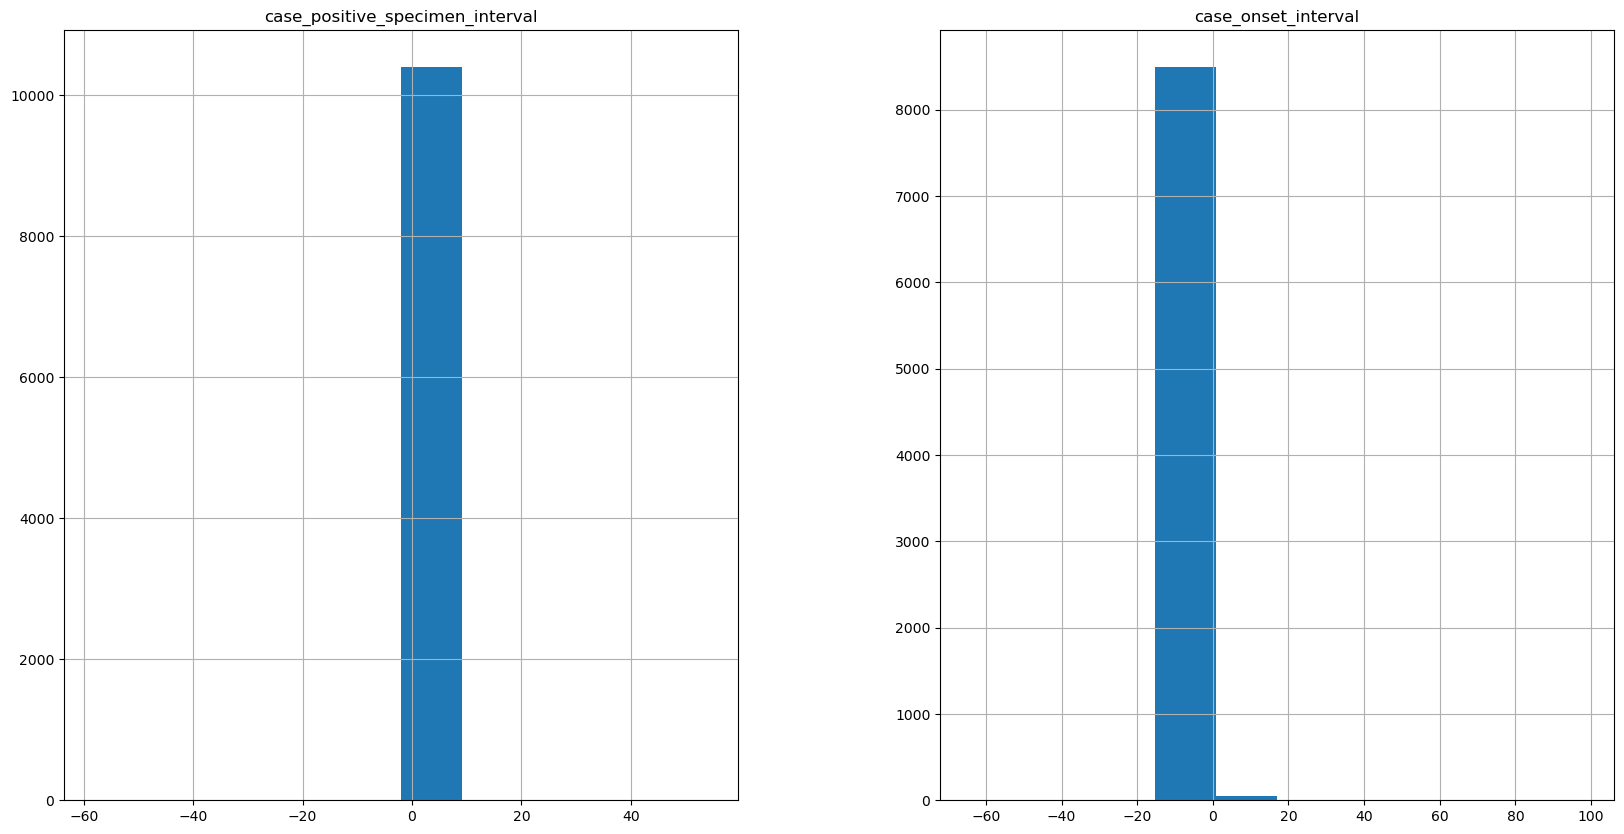

In [46]:
plt.figure()
df.hist(figsize = (20,10))
plt.savefig('continuous_histograms.pdf')


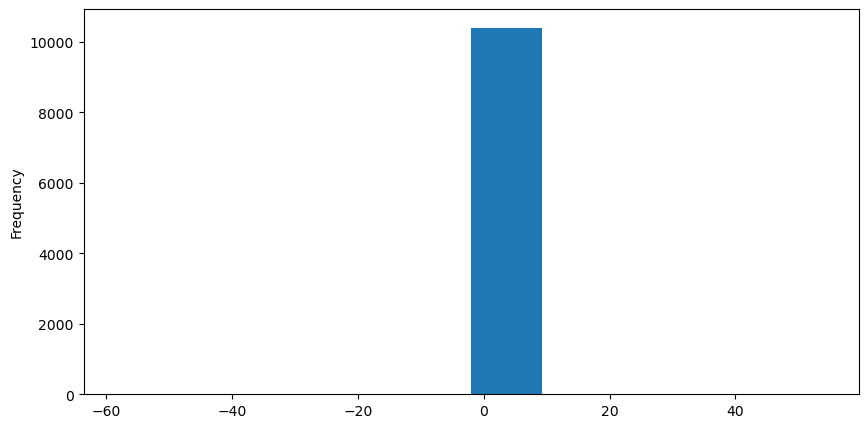

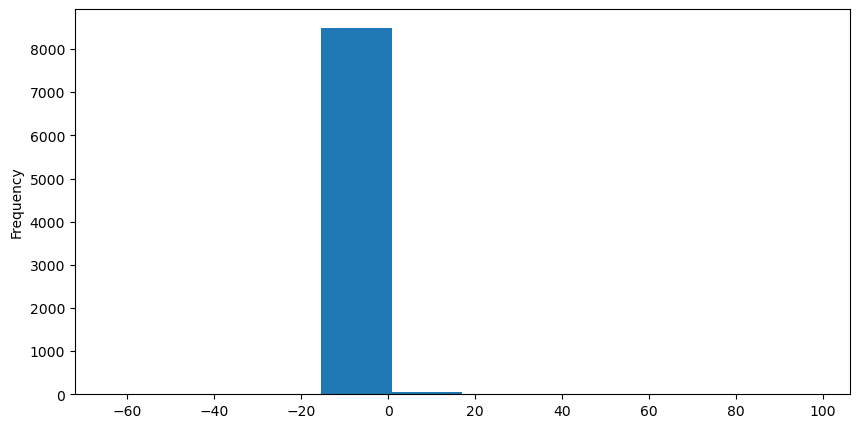

In [47]:
with PdfPages('continuous_histogram2.pdf') as pdf:
    for column in continuous_columns:
        graph = df[column].plot(kind='hist', figsize=(10,5))
        pdf.savefig(graph.get_figure())
        plt.show()  

### Plot Box plots Summary Sheet for all countinous features

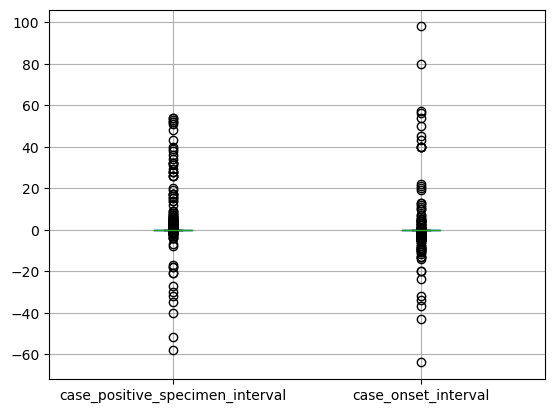

In [48]:
plt.figure()
df.boxplot(figsize=(30, 40))
plt.savefig('continuous_boxplots.pdf')  

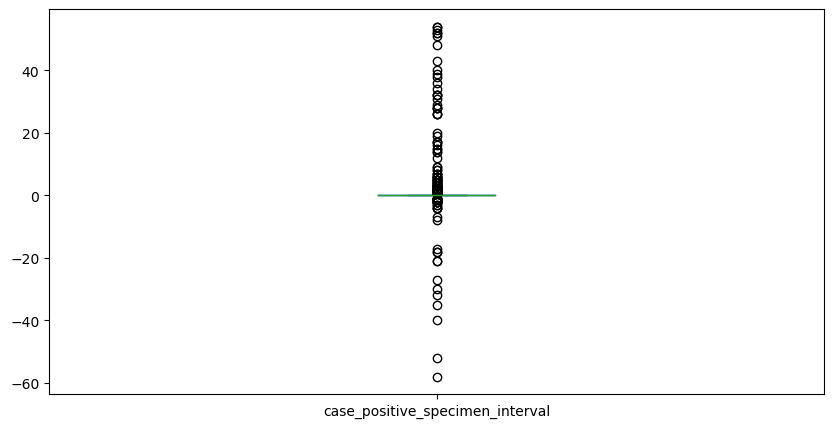

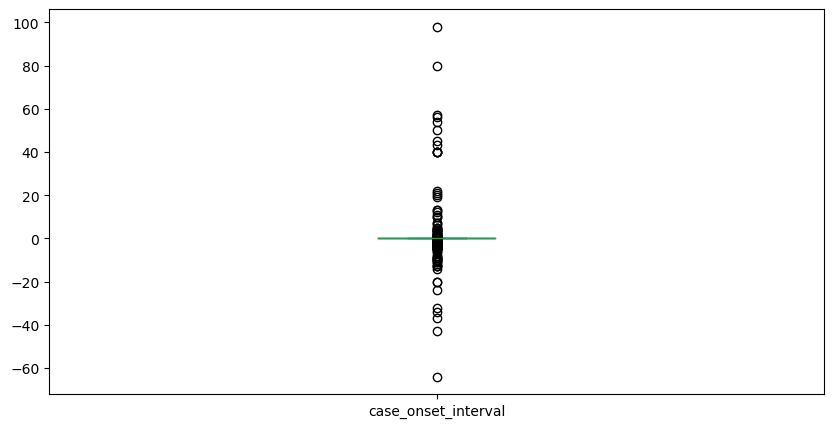

In [49]:
with PdfPages('continuous_boxplots2.pdf') as pdf:
    for column in continuous_columns:
        graph = df[column].plot(kind='box', figsize=(10,5))
        pdf.savefig(graph.get_figure())
        plt.show()  

### Plot the bar plots individual sheet for all category features

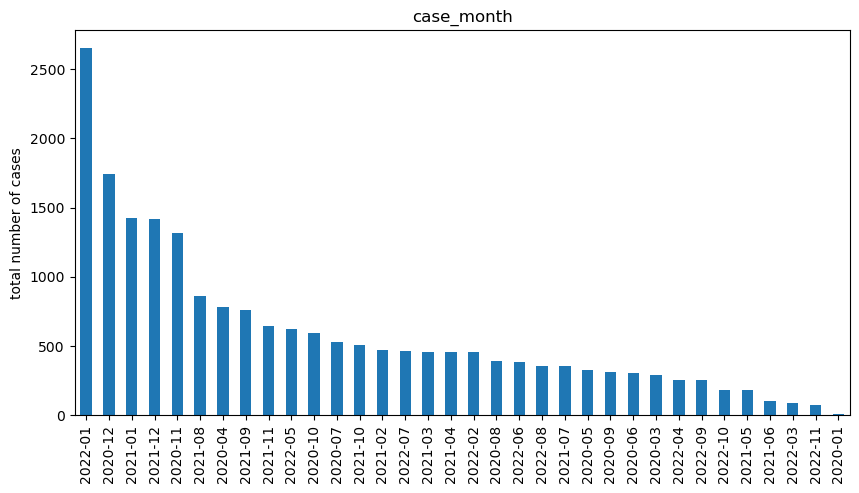

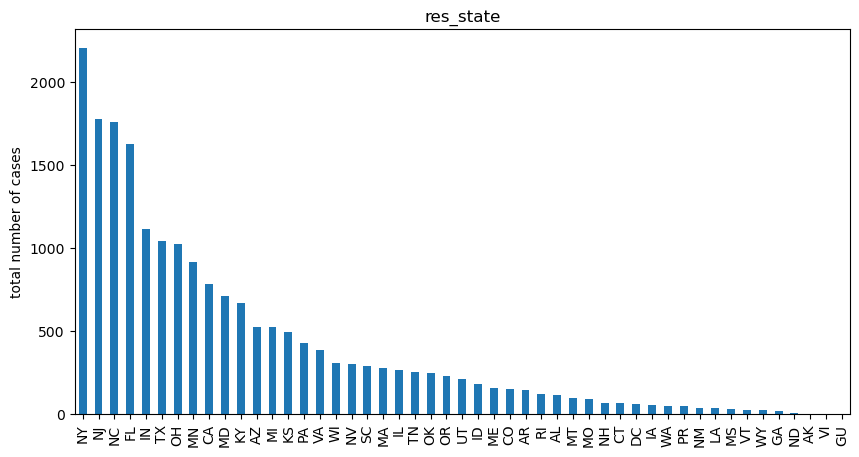

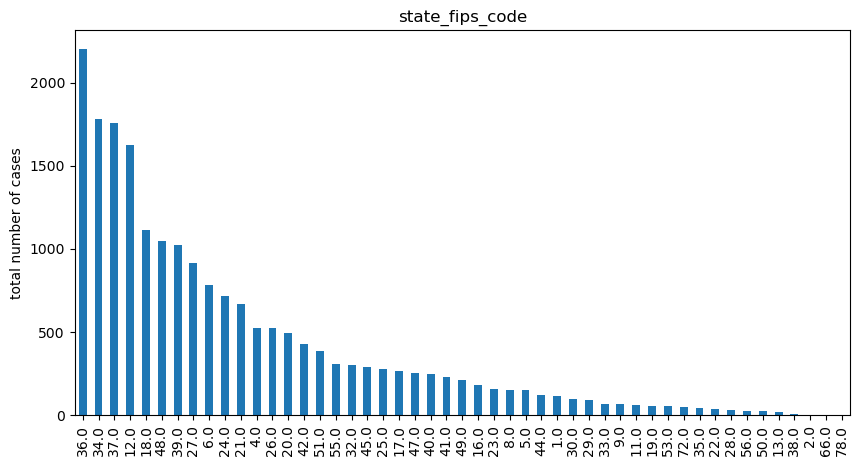

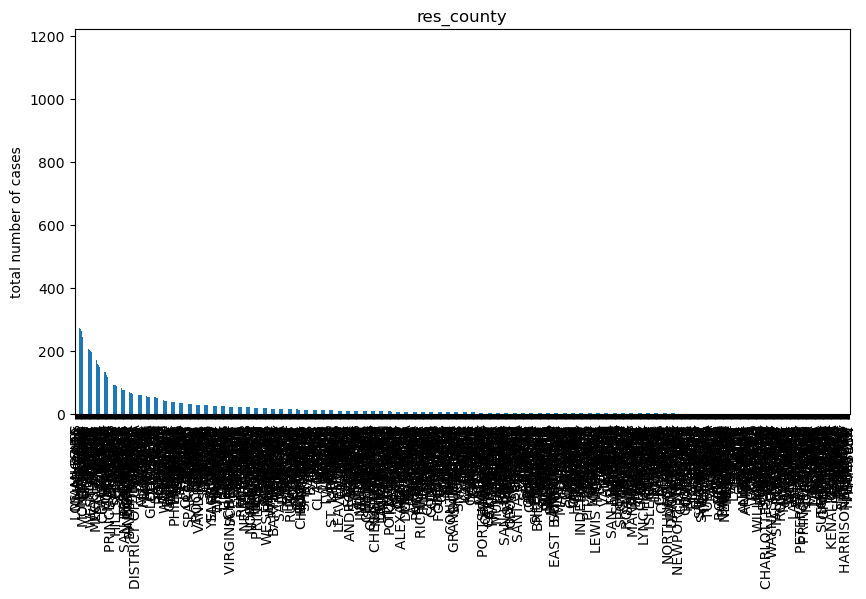

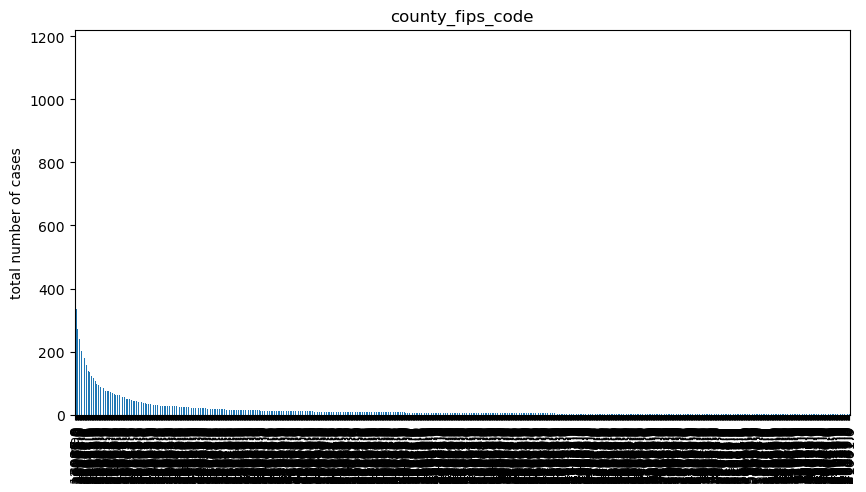

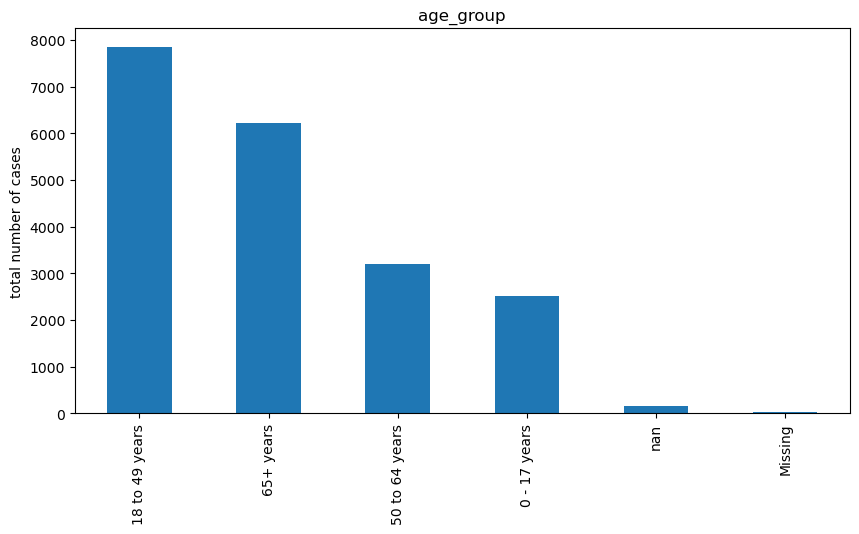

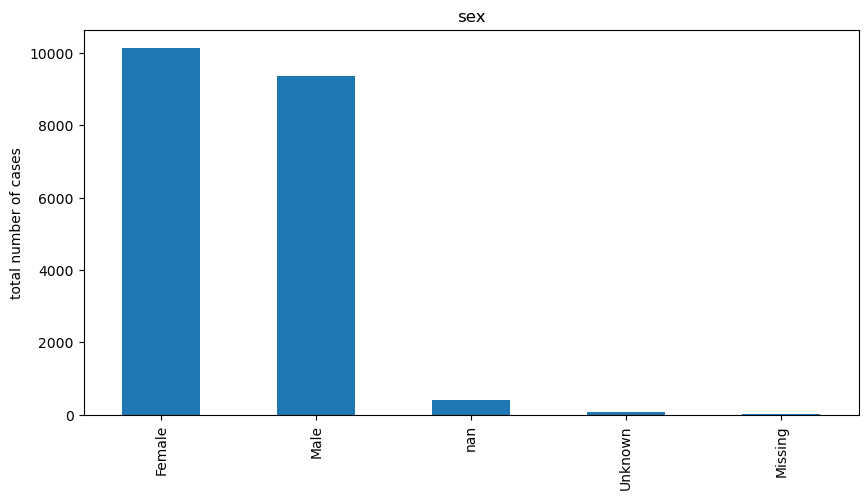

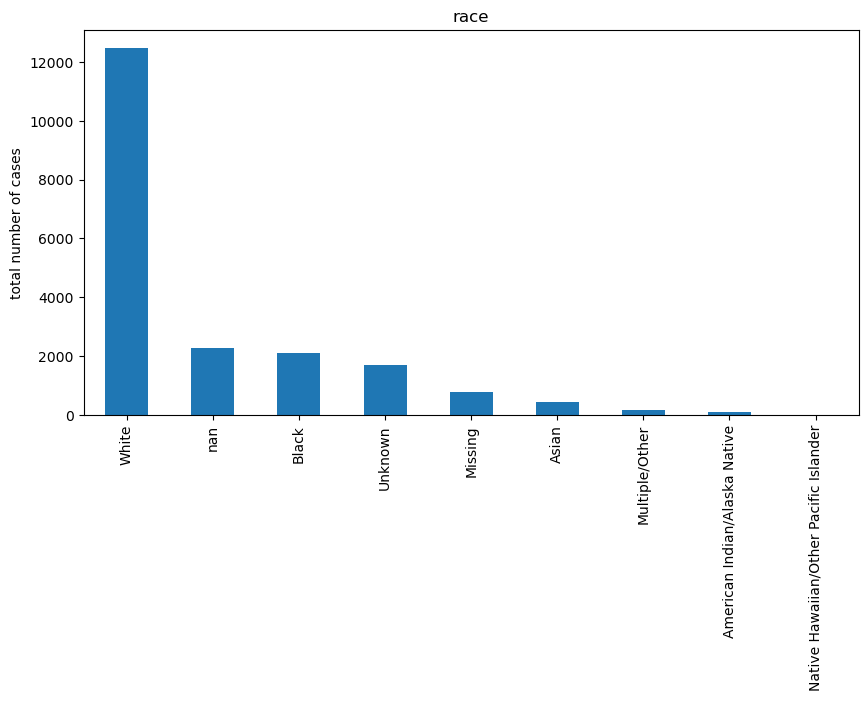

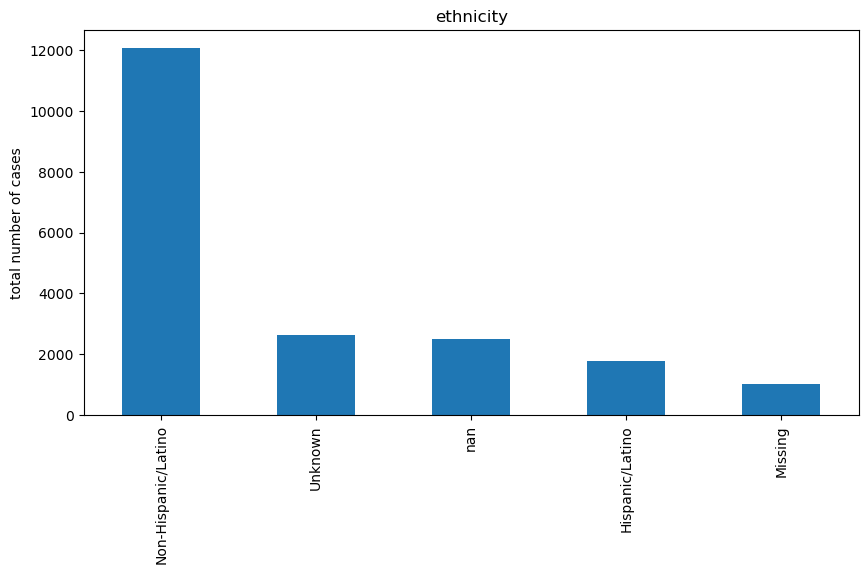

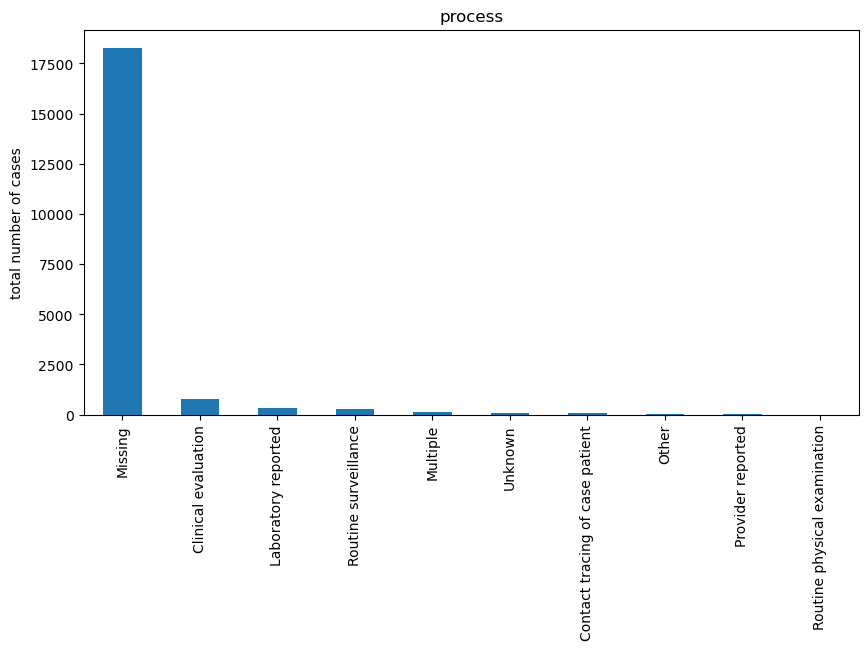

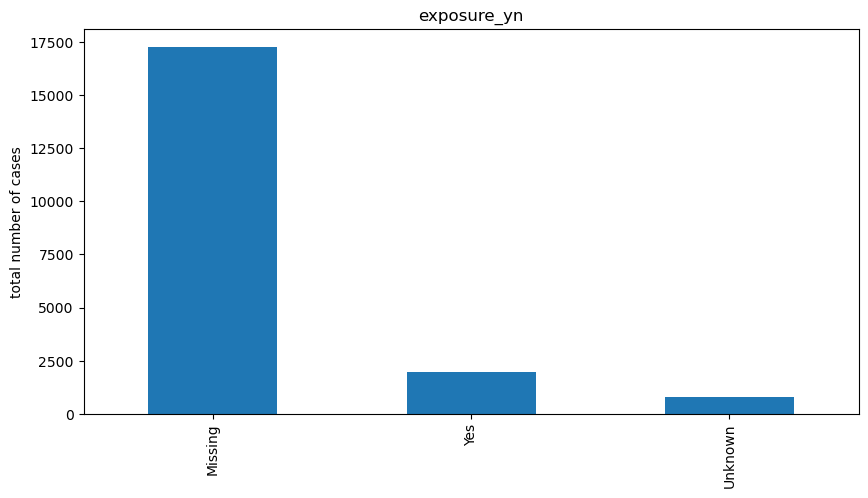

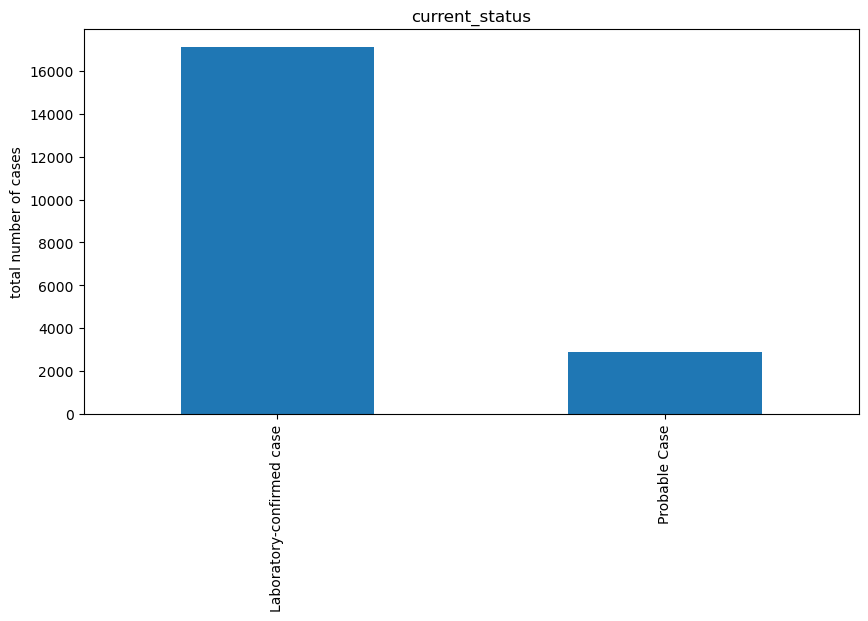

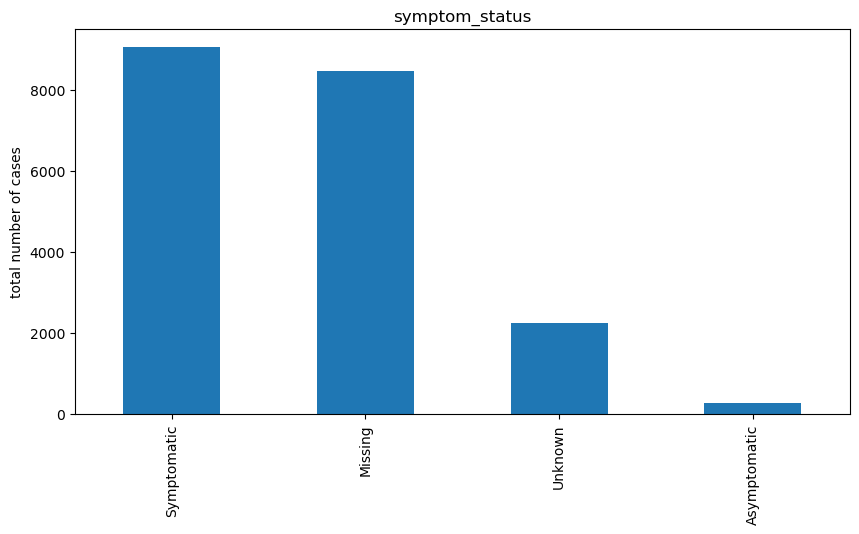

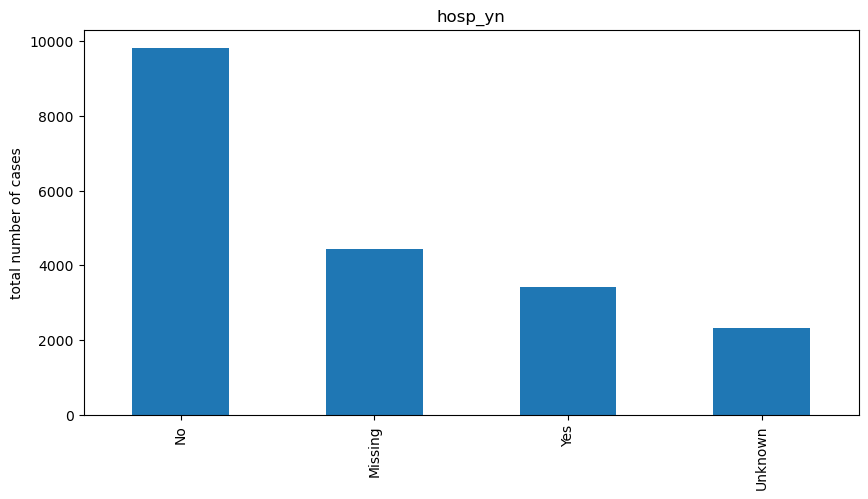

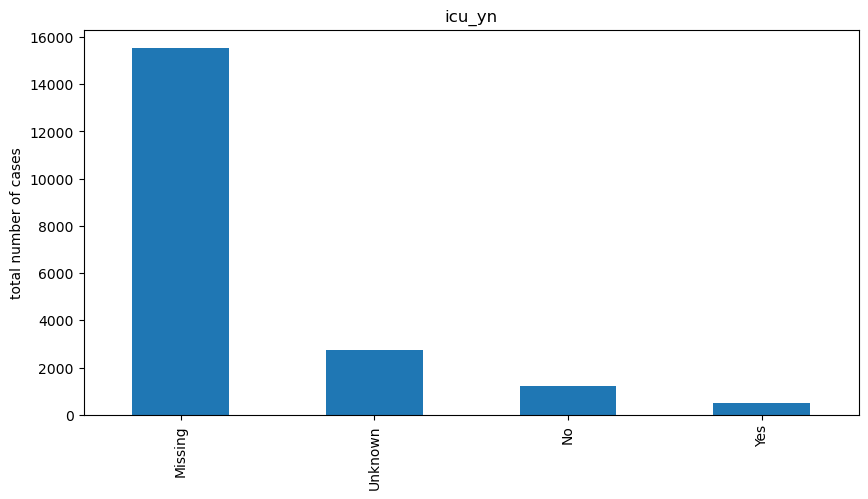

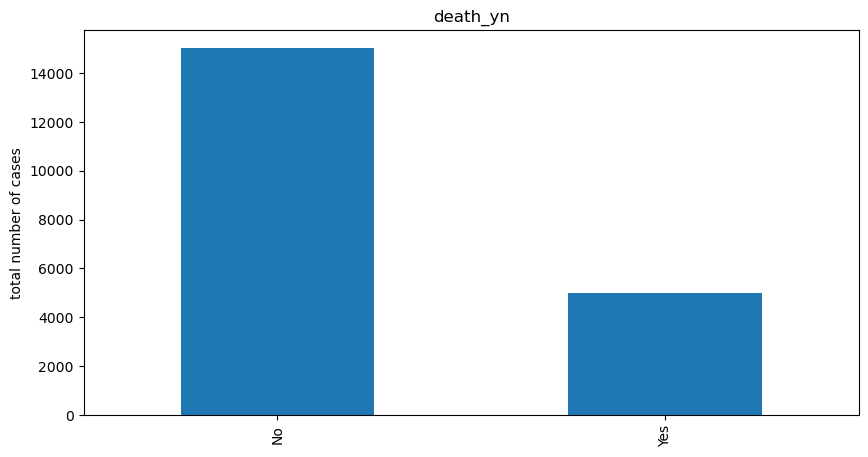

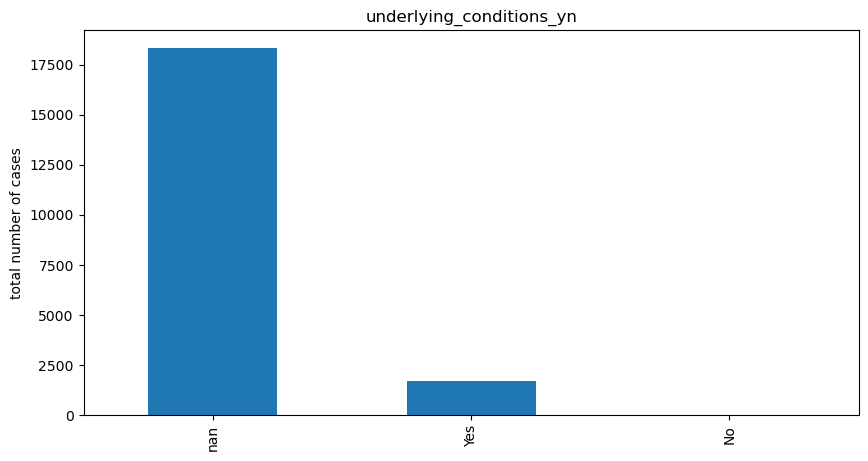

<Figure size 640x480 with 0 Axes>

In [50]:
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for column in df:
        if df[column].dtypes == 'category':
            graph = df[column].value_counts(dropna = False).plot(kind='bar', figsize=(10,5))
            plt.title(column)
            plt.ylabel('total number of cases')
            pp.savefig(graph.get_figure())
            plt.show()
plt.savefig('categorical_plots.pdf')

             

             

NUMBER 2

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 


### The initial list of issues as identified in the Covid_Data_Quality_Report.pdf:

- **data types:** Two features county_fips_code, and state_fips_code are not continuous, they contain finite amount of numerals which serves as identifiers of states and counties


- **missing values:** 4 features (underlying_conditions_yn, icu_yn, exposure_yn, process) had over 90% of their data missing. additionally,case_onset_interval,case_positive_specimen_interval, symptoms status all had 40% of their data missing . Also Missing values are coded under several names, such as Missing, Unknown and NaN


- **Repetitive features:** Certain features were used to represent individual states or counties in the data, in multiple ways. This include the state fips code, res state, County_fips_code, res_county. Overall they all provide similar information.

- **Outliers:** There were a significant number of outliers present in the case_onset_interval and case_positive_specimen_intervals. This would be observed to identify probable cause for this values, and removed or replaced if illogical.

### - Propose solutions to deal with the problems identified.

- **Data Types:** Change the data types of state_fips_code and county_fips_code to categorical data types


- **Missing Values:** For our data, it is very important that the name or identifier for missing values is standardised. Therefore, all missing values (NaN, Missing, Unknown) should be coded as Missing. Process and Exposure_yn should be dropped, they dont convey any vital information neccesary for the data, and based on the definition of exposure_yn it would always be Yes making it a constant column. Keeping case_onset_interval, symptom_status, icu_yn, and underlying_conditions_yn as this might convey important information for my analysis, especially when analysing various risk outcome pairs. Categorical data with 30% or less of their values missing, would be filled with the mode.



- **Repetitive features:** I would be dropping the county_fips_code and state_fips_code because these are just unique numerical identifiers for each state in the dataset, and should be considered duplicate rows since the name of the state and county are already unique. I would also be dropping the res_county, because this are only counties within the state, and form aggregate data used at state level. Plus, the data contained in the res_county is not as complete as res_state


- **Outliers:** all outliers would be left as is, as i believe the results are plausible. however, negative values would be made positive, because the data might have been calculated by swapping dates, and removing this data would severely affect the usefulness of both features because more than 40% of their values are already missing. 

1. Dealing With Multiple Definitions (or Classifications) of Missing Data(i.e NaN, Unknown, Missing)

In [51]:
#The For loop converts all Missing, NaN and Unknown values to Missing
for columns in df:
    if df[columns].dtypes == 'category':
        df[columns].replace([np.nan,'Missing', 'Unknown'], 'Missing', inplace = True)
        
        #The for loop also changes the dtype of object features to category
        #df[columns] = df[columns].astype('category')
      

The code above ensures all missing, private(or NaN) and unknown are merged under a single value 'Missing'. This was done to standardise the naming. 

- Missing values in continuous data remains NaN, because 0 is a valid data entry for both continuous features, leaving them as NaN is the best option.

2. Inputting data into categorical features with less than 30% missing values

In [52]:
#Replace columns with less than 35% missing values with mode
for column in df:
    if (100 * (df[column].isin(['Missing']).mean())) < 31:
        df[column].replace(['Missing'], df[column].mode(), inplace=True)


The code above was used to input. data into categorical features with missing values. This was done by replacing missing values with the Mode.

- This was done because removing missing values would cause significant data loss

3. Drop Features with large amount of missing values

In [53]:
#Dropping exposure and process features
df.drop(columns=['exposure_yn', 'process'], inplace=True)

The process and exposure features were dropped 
- They were because more than 90% of data in the two features are missing


- Also, exposure_yn checks if a person was exposed to the virus through several means (e.g. close contact, transport) etc. We can safely assume with a high certainty that the majority of people who have the virus had some form of exposure based on the settings and exposure should always be yes


- Process only qualifies how the positive case was identified, so it does not really carry any relevant information critical to this analysis.


- Other features with high percentage of missing values (i.e. > 60%) such as icu_yn and undelying_conditions_yn, were left for further analysis as they might contiain sensitive or vital information regarding Covid-19 

4. Rows That Convey The Same Information

In [54]:
#Checking if both res_county and county_fips_code column has same Total missing values
#Judging by the graphical layout and the sum of missing values 
#we can assume both columns are identical
print(f"Total Missing county: {df['res_county'].isin(['Missing']).sum()}; Total Missing county code: {df['county_fips_code'].isin(['Missing']).sum()}")


Total Missing county: 0; Total Missing county code: 0


In [55]:
#Checking if both res_county and county_fips_code column has same Total missing values
#Judging by the graphical layout and the sum of missing values 
#we can assume both columns are identical
print(f"Total Missing state: {df['res_state'].isin(['Missing']).sum()}; Total Missing state code: {df['state_fips_code'].isin(['Missing']).sum()}")


Total Missing state: 0; Total Missing state code: 0


In [56]:
#Dropping exposure and process features
df.drop(columns=['res_county', 'county_fips_code', 'state_fips_code'], inplace=True)

Both the res_state - state_fips_code and res_county - county_fips_code all seem to have the same information.

- The "fips_code" are similar to postcodes or area codes and act as unique numeric identifiers for states, but the state initials are unique as well


- The res_county was dropped because it contains information which is aggregated to form res_state data. The res_state  also has more complete infomation than the res_county,  since res_state has no missing value. 

6. Dealing with negative values in case_onset_interval and case_positive_specimen_interval

In [57]:
#Confirming there are no negative numbers in either table
print('Number of rows with negative value for case_onset_interval:', df[df['case_onset_interval']<0].shape[0])
print('Number of rows with negative value for case_positive_specimen_interval:', df[df['case_positive_specimen_interval']<0].shape[0])


Number of rows with negative value for case_onset_interval: 280
Number of rows with negative value for case_positive_specimen_interval: 57


In [58]:
#Converting Rows with negative values to positive
df['case_onset_interval']= df['case_onset_interval'].abs()

In [59]:
#Converting Rows with negative values to positiv
df['case_positive_specimen_interval']= df['case_positive_specimen_interval'].abs()

In [60]:
#Confirming there are no negative numbers on either table
print('Number of rows with negative value for case_onset_interval:', df[df['case_onset_interval']<0].shape[0])
print('Number of rows with negative value for case_positive_specimen_interval:', df[df['case_positive_specimen_interval']<0].shape[0])


Number of rows with negative value for case_onset_interval: 0
Number of rows with negative value for case_positive_specimen_interval: 0


The negative rows (or data) in the case_onset_interval and 'case_positive_interval' were converted to positive integers.

- This was done with assumption that negative rows should not exist, and the only way negative numbers could be achieved is if the days were swapped or negative sign was inputted by error


7. Cases With case_onset_intervals and missing symptoms

In [61]:
#Replacing values whenever case onset interval is >= 0 and symptom_status is missing 

replace = (df['case_onset_interval'] >= 0) & (df['symptom_status'].isin(['Missing']))

df.loc[replace, 'symptom_status'] = 'Symptomatic'

In [62]:
#Rerunning test 6

test_2 = df[['case_onset_interval', 'symptom_status']][(df['case_onset_interval'].notnull()) & (df['symptom_status'] != 'Symptomatic')]
print(f"Number of rows failing_test =  {test_2.shape[0]}")
test_2.head(5)

Number of rows failing_test =  0


,case_onset_interval,symptom_status


As observed above, the rows were 

### Summary of data quality plan:


|Feature|data quality issue| hanndling strategy|
|-------|------------------|-------------------|
|case_month|None| Keep as is|
|res_state| None| Keep as is|
|state_fips_code| The datain this column is repititive, it is just the state code for states in res_state| Drop Feature|
|res_county | None| Keep as is|
|county_fips_code| Repititive data, it represent the fips code of counties in res_county | frop feature|
|age_group | None | Keep as is|
|sex  |None | Keep as is  |
|race | Missing values 23.6 % | Investigate rows affected |
|ethnicity | Missing Values 30% | Investigate rows affected |
|case_positive_specimen_interval | Has negative values | Based how the data is obtained, the values for this feature should not be negative. it is is possible the dates were swapped during calculation, so converting negative numbers to  positive|
|case_onset_interval | Has negative values | Based how the data is obtained, the values for this feature should not be negative. it is is possible the dates were swapped during calculation, so converting negative numbers to  positive|
|process   | Missing values > 90% | Drop Feature|
|exposure_yn | missing_values > 90%| Dropping feature, moreover based on the definition of the exposure_yn in the dictionary, exposure should always equal yes|
|current status | None | keep as is |
|symptoms status | None | Keep as is |
|hosp_yn | None | Keep as is |
|icu_yn | Missing values > 90% | Keep as is |
|death_yn | None | Keep as is |
|underlying_conditions_yn| Missing values > 90%| Keep as is|

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

In [63]:
# Write the cleaned dataframe to a csv file
df.to_csv('CDC_cleaned data.csv', index=False)

# Number 3

### Choose a  Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices


#### - Countinuous feature plots: I observed the pairwise interaction for this features

 - case_positive_specimen_interval
 
 - case_onset_interval
 
 
#### - Categortical Features:
 - age_group
 
 - symptom_status
 
 - case_month
 
 - sex
 
 - underlying_conditions_yn
 
 - hosp_yn
 
 - icu_yn
 
 - res_state
 
 - death_yn
 
 - race
 
 
#### - Categorical Countinuous
 - Case_positive_specimen_interval vs sex
 
 - case_onset_interval vs sex
 
 - case_onset_interval vs age_group
 
 
 These were selected to observe and document how the interaction between feature pairs which might provide vital information on their correlation, and the impact on cases in our dataset. As disussed, based on plots from the data_quality_report pdf

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 


### Correlation For Numeric Features

(array([0.5, 1.5]),
 [Text(0.5, 0, 'case_positive_specimen_interval'),
  Text(1.5, 0, 'case_onset_interval')])

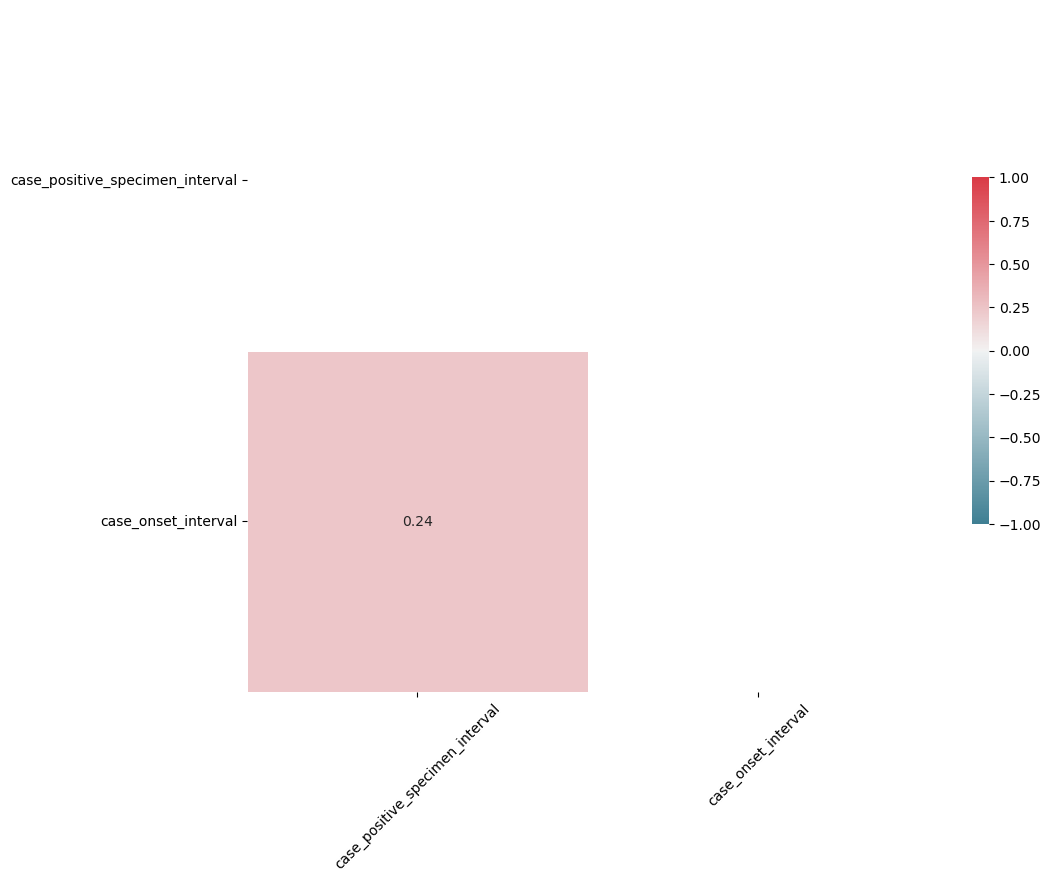

In [64]:
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='case_onset_interval', ylabel='case_positive_specimen_interval'>

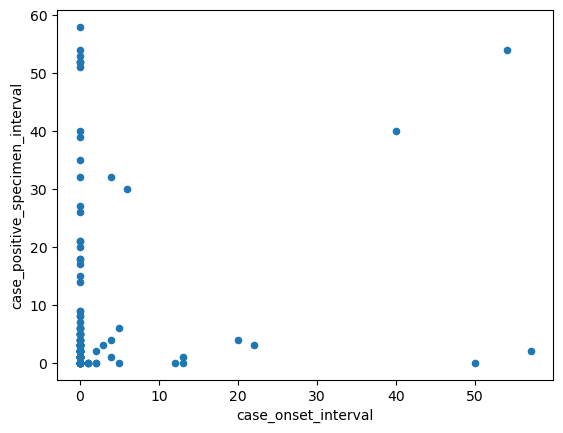

In [65]:
df.plot(kind='scatter', x='case_onset_interval', y='case_positive_specimen_interval')

The correlation matrix points towards positive correlation between case_onset_interval and case_specimen_interval (0.24).

- The majority of the data points in the scatter plot is clustered betweeen 0 and 1, however, we can also observe  four otliers between.

## Categorical VS Categorical

case_month
2020-01       7
2020-03     290
2020-04     782
2020-05     325
2020-06     304
2020-07     529
2020-08     389
2020-09     309
2020-10     596
2020-11    1314
2020-12    1740
2021-01    1425
2021-02     470
2021-03     459
2021-04     458
2021-05     180
2021-06     102
2021-07     352
2021-08     862
2021-09     760
2021-10     510
2021-11     641
2021-12    1419
2022-01    2649
2022-02     454
2022-03      90
2022-04     257
2022-05     619
2022-06     387
2022-07     462
2022-08     355
2022-09     254
2022-10     180
2022-11      70
Name: case_month, dtype: int64


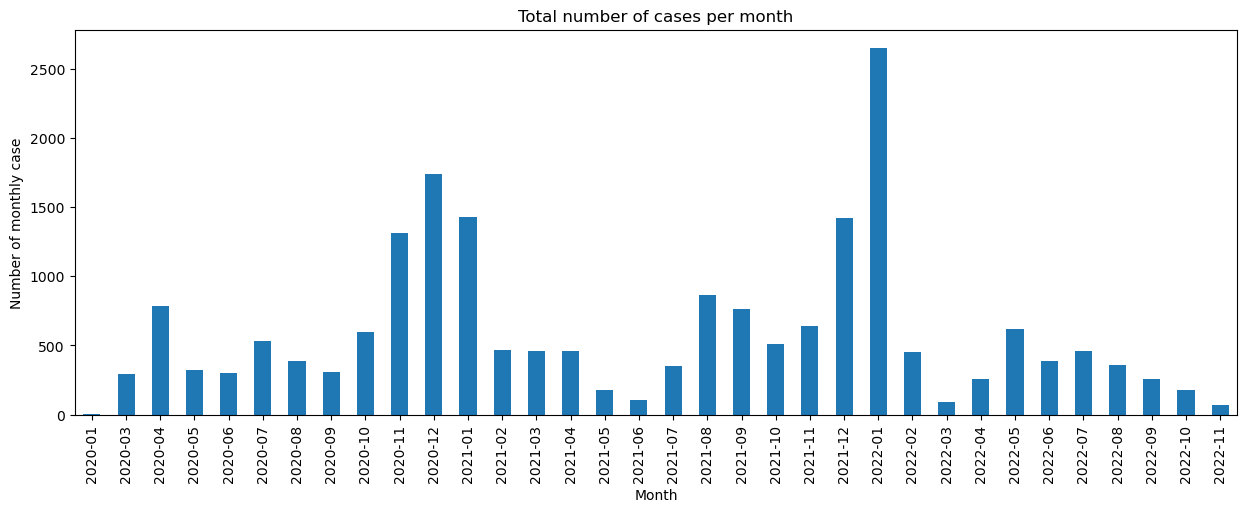

Text(0.5, 0, 'Month')

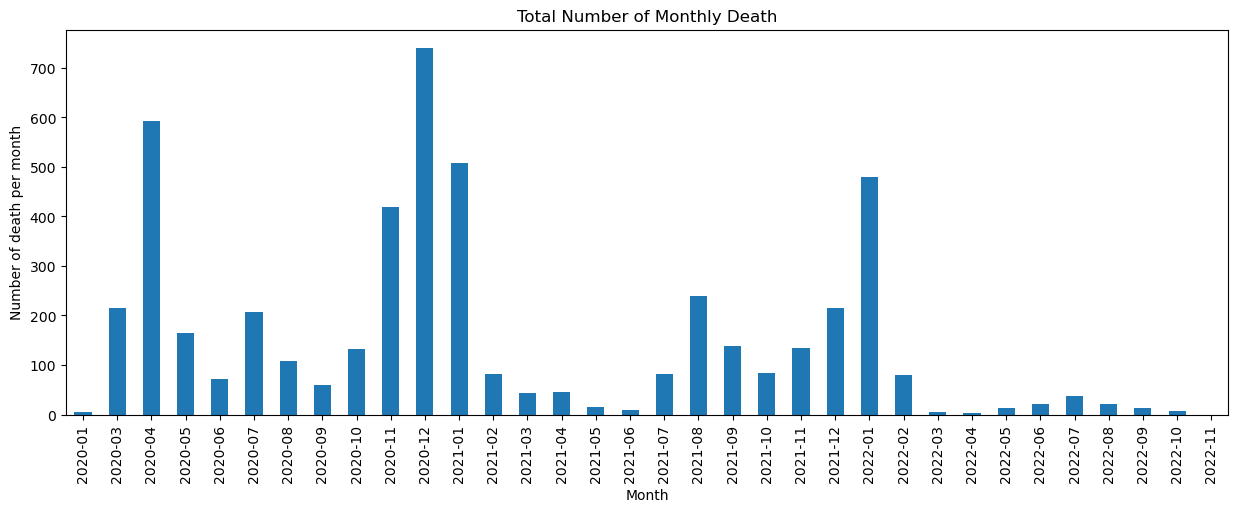

In [66]:

# Calculating total number of cases per month
monthly_cases = df.groupby(['case_month'])['case_month'].count()
monthly_death = df.groupby(['case_month'])['death_yn'].apply(lambda x: (x=='Yes').sum())
print(monthly_cases)

# plotting bar chart
monthly_cases.plot.bar(title='Total number of cases per month', figsize = (15,5))
plt.ylabel('Number of monthly case')
plt.xlabel('Month')
plt.show()

monthly_death.plot.bar(title = 'Total Number of Monthly Death', figsize = (15,5))
plt.ylabel('Number of death per month')
plt.xlabel('Month')


The graph above shows the total number of cases per month and the total number of death. The graph was plotted with the intent0

- As expected the total number of death per month follows a similar trend with the total number of cases per month


- This remained true, except for 2022-01, wich had a largest number of caes recorded in a month, but had relatively low deaths in comparison. Especially when compared to previous months

symptom_status
Asymptomatic    22.692308
Symptomatic     24.360902
Name: death_yn, dtype: float64


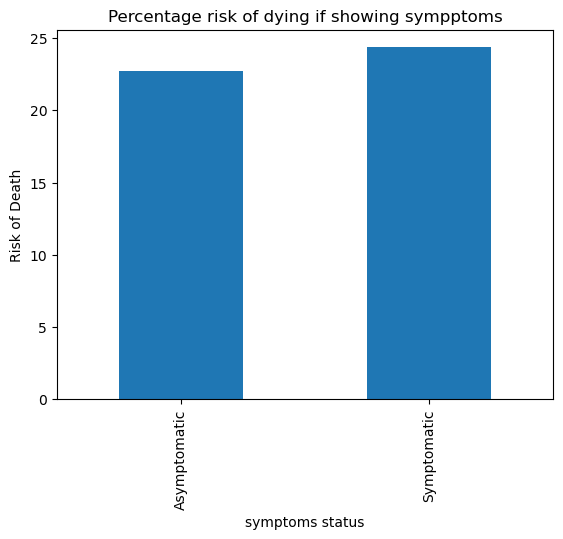

In [67]:
#Grouping sex by symptom status
sex_death = df.groupby(['symptom_status'])['death_yn'].apply(lambda x: (x=='Yes').mean() * 100).drop('Missing')

print(sex_death)
#Plotting bar chart to view the total number of people showing  symptoms  across gender
sex_death.plot.bar(title='Percentage risk of dying if showing sympptoms')
plt.ylabel('Risk of Death')
plt.xlabel('symptoms status')
plt.show()

The graph above was plotted to see if being symptomatic or not is associated with a higher risk of dying

- From observation, it does not seem being symptomatic have great influence on the risk of dying


- More suprisingly, being asymptomatic and symptomatic have about the same impact on the risk off deatj, with being asymptomatic slightly higher. 


- This difference however, could be an overestimation for asymptomatic case, because there are a very small amount of asymptomatic cases in our dataset


sex
Female    4790
Male      4324
Name: symptom_status, dtype: int64


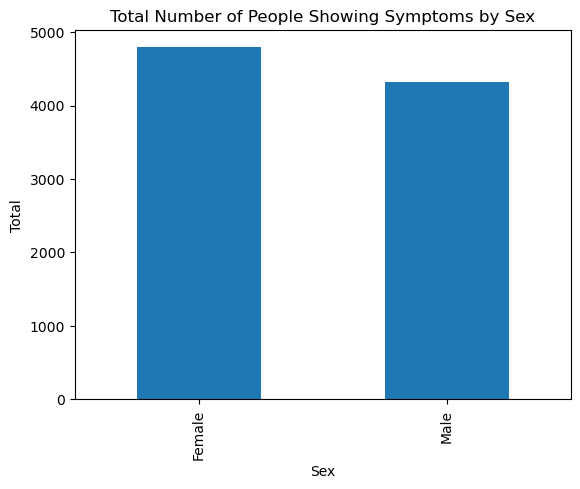

In [68]:
#Grouping sex by symptom status
sex_symptom = df.groupby(['sex'])['symptom_status'].apply(lambda x: (x=='Symptomatic').sum())

print(sex_symptom)
#Plotting bar chart to view the total number of people showing  symptoms  across gender
sex_symptom.plot.bar(title='Total Number of People Showing Symptoms by Sex')
plt.ylabel('Total')
plt.xlabel('Sex')
plt.show()

As seen above, we can see a graph by the number of people showing symptoms by sex

- As observed there is only a slight difference in the number of prevalence of symptoms in males and females, with more females showing symptoms

sex
Female    22.196147
Male      28.938941
Name: death_yn, dtype: float64


Text(0.5, 0, 'Sex')

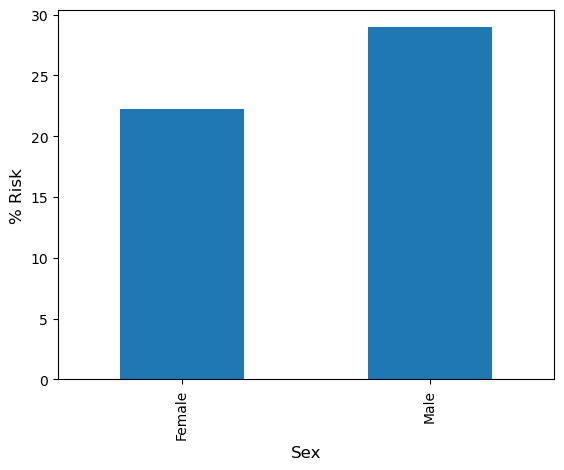

In [69]:
deathrisk_sex = df.groupby(['sex'])['death_yn'].apply(lambda x: (x=='Yes').mean()) * 100

print(deathrisk_sex)
deathrisk_sex.plot.bar("Percentage Risk of Dying by Sex")
plt.ylabel('% Risk', fontsize=12)
plt.xlabel('Sex', fontsize = 12)

This graph was plotted to see if there are gender differences with the risk of death

- Males seems to be more suceptible to dying from covid 19 when compared to women (28.94% vs 22.20%)

sex     age_group     
Female  0 - 17 years      1230
        18 to 49 years    4304
        50 to 64 years    1629
        65+ years         3064
Male    0 - 17 years      1237
        18 to 49 years    3471
        50 to 64 years    1535
        65+ years         3125
Name: sex, dtype: int64


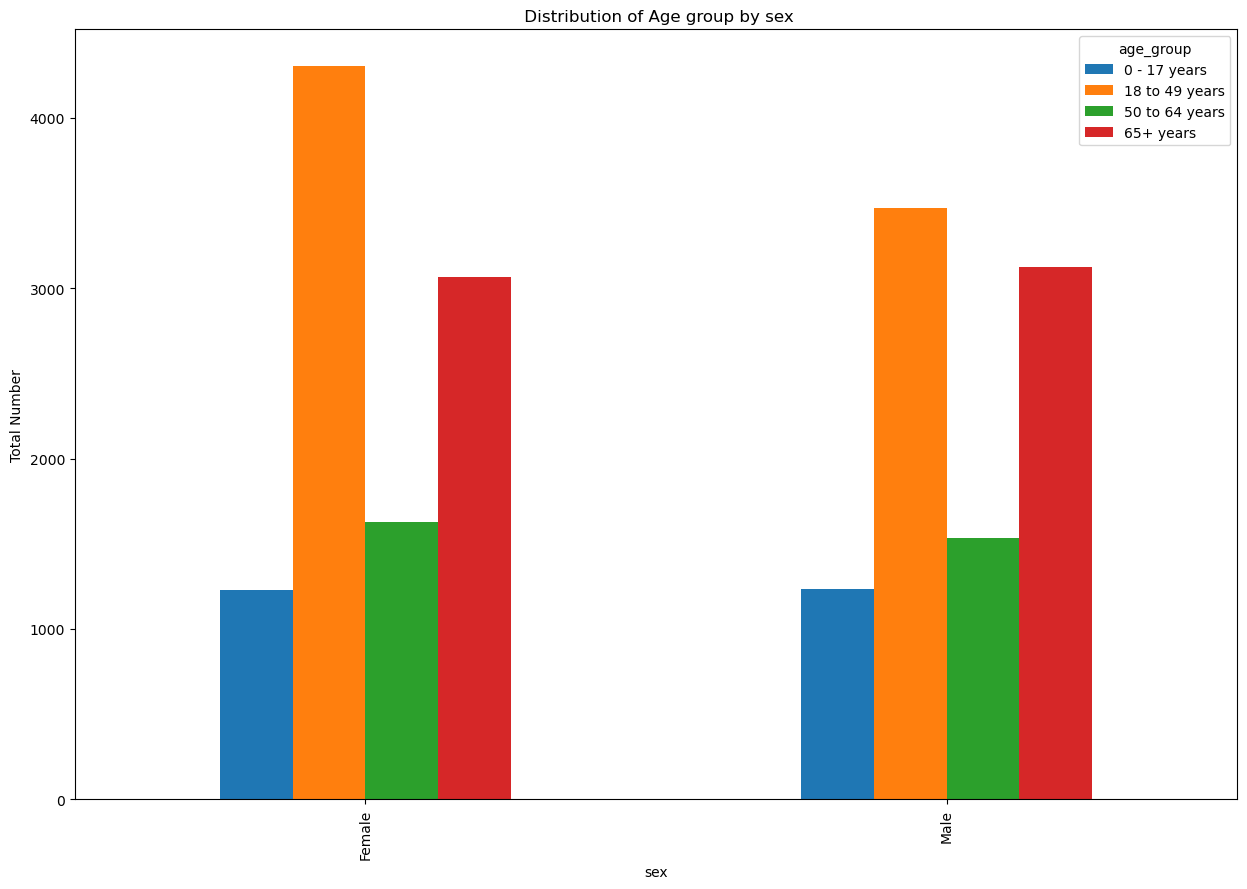

In [70]:
#
population_distribution = df.groupby(['sex', 'age_group'])['sex'].count()

print(population_distribution)

#plot graph to display Population distribution by age and sex
population_distribution.unstack().plot.bar(title=' Distribution of Age group by sex', figsize = (15,10))
plt.ylabel('Total Number')
plt.xlabel('sex')
plt.show()

Descriptive statistics to show the distribution of age groups across sex.

- The age group 18-49, seems to have the largest population in both sexes


- age group 65+ years, are the second most prevalent group in this dataset


- Across both sexes, age groups between 0 - 17 years has the lowest population

age_group
0 - 17 years       0.831354
18 to 49 years     2.991886
50 to 64 years    13.667497
65+ years         43.631393
Name: hosp_yn, dtype: float64


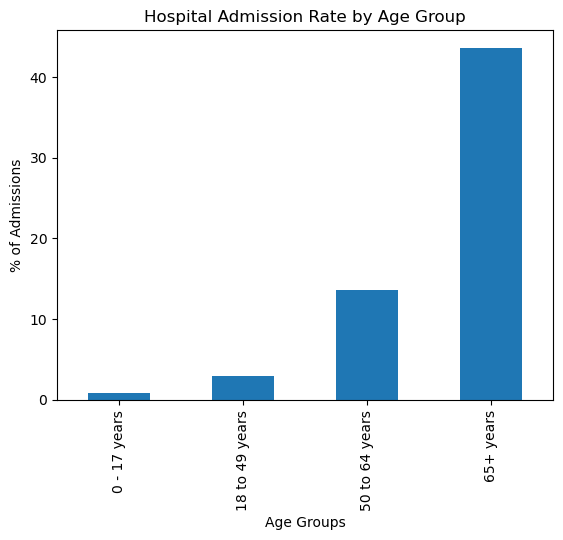

In [71]:

# grouping age_group by hospital admission
hosp_admission = df.groupby(['age_group'])['hosp_yn'].apply(lambda x: (x=='Yes').mean() * 100)
print(hosp_admission)

# plotting bar chart
hosp_admission.plot.bar(title='Hospital Admission Rate by Age Group')
plt.ylabel('% of Admissions')
plt.xlabel('Age Groups')
plt.show()


The graph above shows the probability of being admitted in a hospital across several age groups in the dataframe.

- From Observation children, teenagers and young adults (between 0-49 years) are less likeyly to be hospitalised from the virus



- Older adults (65+ years) however, are the most likely to be hospitalised. infact they more than two times likely to be hospitalised when compared to those within 50-64 years



- The graph shows a clear trend between age and hospitalization, with the likelyhood of hospitalization increasing by age

age_group
0 - 17 years       0.039588
18 to 49 years     1.343813
50 to 64 years    13.978829
65+ years         71.244773
Name: death_yn, dtype: float64


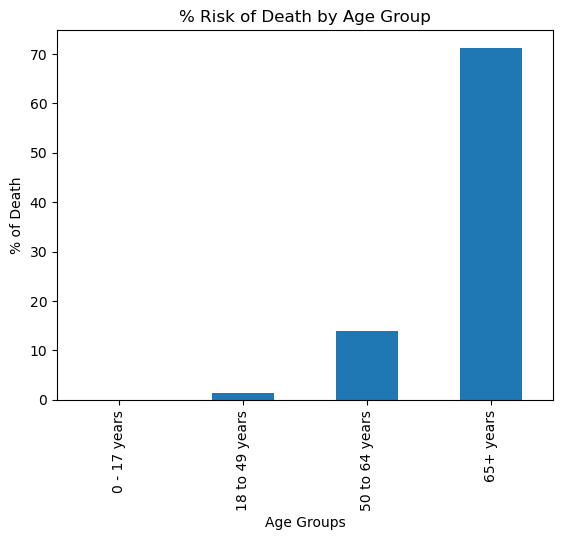

In [72]:

# grouping age_group by hospital admission
death_age_group = df.groupby(['age_group'])['death_yn'].apply(lambda x: (x=='Yes').mean() * 100)
print(death_age_group)


# plotting bar chart
death_age_group.plot.bar(title='% Risk of Death by Age Group')
plt.ylabel('% of Death')
plt.xlabel('Age Groups')
plt.show()


 This graph was plotted to see the risk of death across age groups
 

 - As expected, individuals over 65+ years has the highest risk of dying
 
 - Those with 0-17 years had the lowest risk of dying of Covid

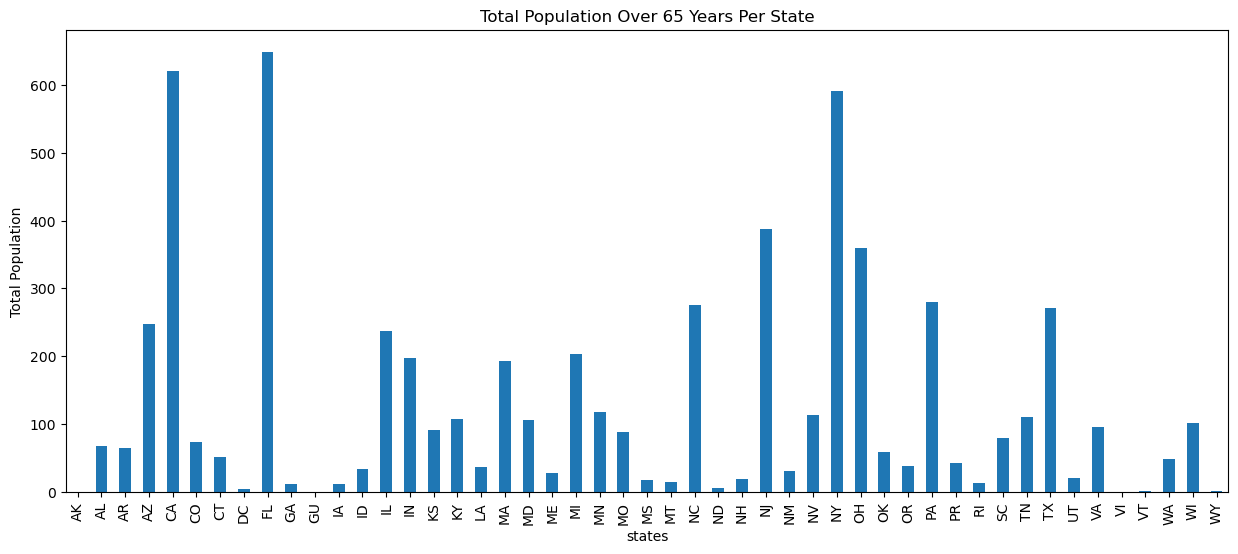

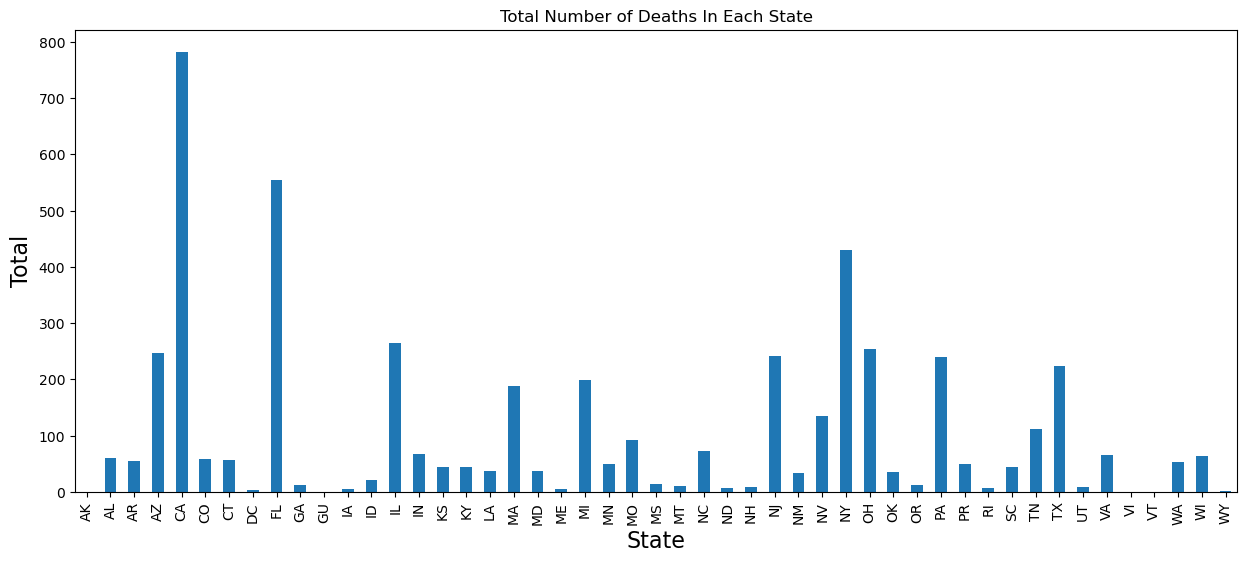

In [73]:
state_agegroup = df.groupby(['res_state'])['age_group'].apply(lambda x: (x=='65+ years').sum())
state_death = df.groupby(['res_state'])['death_yn'].apply(lambda x: (x=='Yes').sum())

state_agegroup.plot.bar(title='Total Population Over 65 Years Per State', figsize=(15,6))
plt.ylabel('Total Population')
plt.xlabel('states')
plt.show()
state_death.plot.bar(title='Total Number of Deaths In Each State', figsize = (15,6))
plt.ylabel('Total', fontsize = 16)
plt.xlabel('State', fontsize = 16)
plt.show()



The Bar Charts above where plotted to examine if states with higher population of over 65s als have higher number of deaths


- From Observations, we can see the overall trend of total deaths in each state mimics the total population of over 65 in each state



- So states with more over 65s tend to have higher number of deaths. However, there are ceratain exceptions. For instance, Florida seems to have the largest over 65 population, but had  second most number of death

race
American Indian/Alaska Native               13
Asian                                      134
Black                                      513
Multiple/Other                               8
Native Hawaiian/Other Pacific Islander       0
White                                     4114
Name: death_yn, dtype: int64


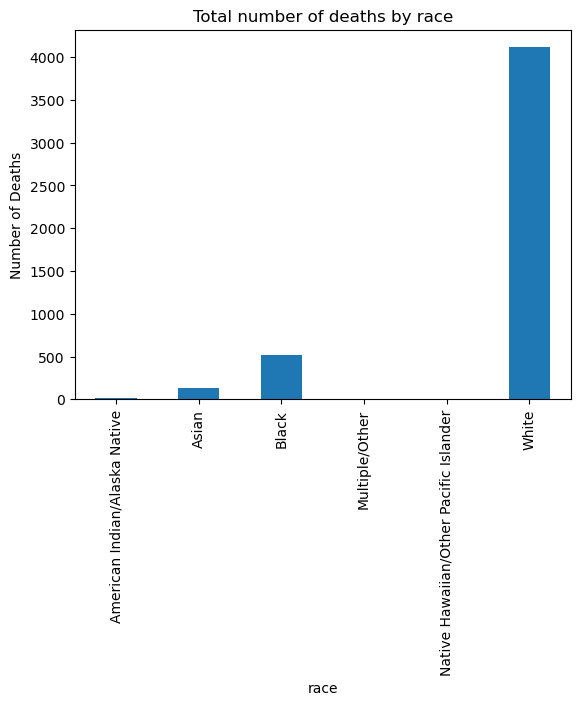

In [74]:
death_race = df.groupby(['race'])['death_yn'].apply(lambda x: (x=='Yes').sum())     
print(death_race)
death_race.plot.bar(title = 'Total number of deaths by race')
plt.ylabel('Number of Deaths')
plt.xlabel('race')
plt.show()


Plotted this graph to observe the total number of deaths by race

- As observed the overwhelming majority of the deaths occured in individuals who identified as white


- This is not suprising as the majority of the people in our dataset identify as white


- To fully understand the spread of death in this dataset, I would opt to use death rate instead


- Would also try to see how the interaction between race and ethnicity would affect the mortality rate

race
American Indian/Alaska Native               14
Asian                                      112
Black                                      406
Multiple/Other                              11
Native Hawaiian/Other Pacific Islander       0
White                                     2671
Name: hosp_yn, dtype: int64


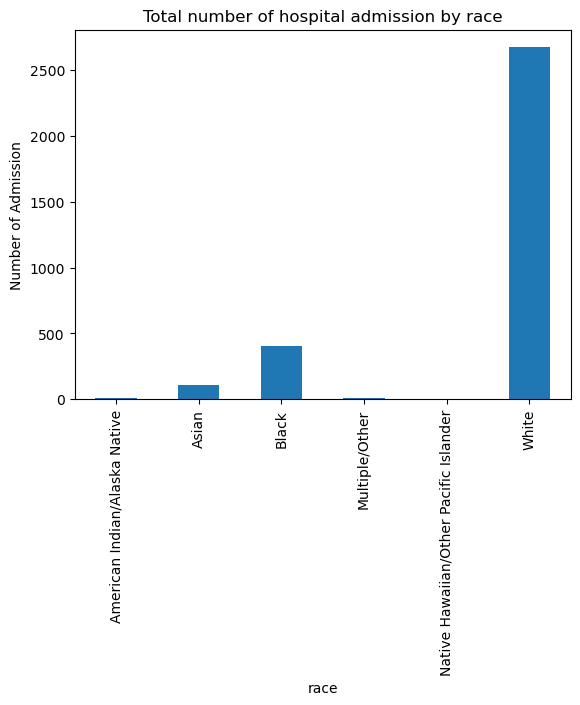

In [75]:
hosp_race = df.groupby(['race'])['hosp_yn'].apply(lambda x: (x=='Yes').sum())     
print(hosp_race)
hosp_race.plot.bar(title = 'Total number of hospital admission by race')
plt.ylabel('Number of Admission')
plt.xlabel('race')
plt.show()


This graph was plotted to see the relationship between race.

- we can observe that those who identify as ethnically white, formed the overwhelming majority of people hospitalised

In [76]:
#creating new dataframe containing rows were icu is not missing
icu_df = df[(df['icu_yn'] != 'Missing')]


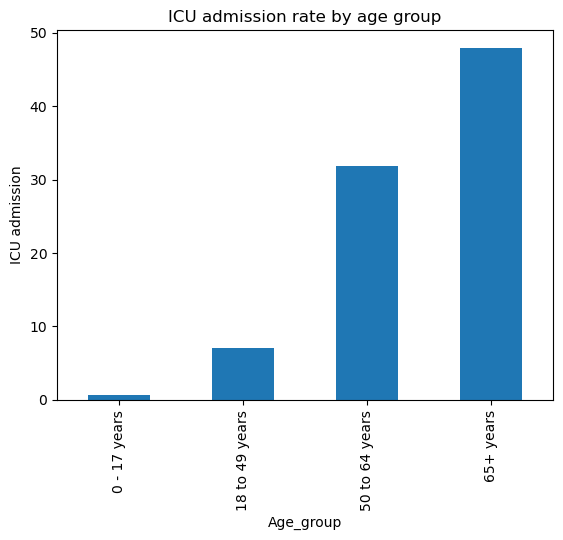

In [77]:
#grouping age groups by icu admissions
icu_admissions = icu_df.groupby(['age_group'])['icu_yn'].apply(lambda x: (x=='Yes').mean() * 100)

#plotting a graph showing icu admission rate by age groups
icu_admissions.plot.bar(title = 'ICU admission rate by age group')
plt.ylabel('ICU admission')
plt.xlabel('Age_group')
plt.show()

The graph above was plotted to see if there are differences between age groups and risk of getting admitted in the ICU

- As observed, those within the ages of 65 aand above, constitute the overwhelming majority of people who are at most risk to getting admitted in ICU with about 48% chance.

- However those within the ages of 0-17 have the lowest risk.

- we can therefore say age has an inpact on being admitted in the hospital

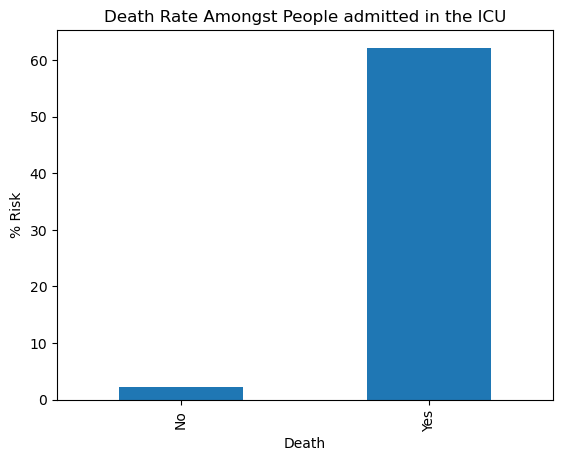

In [78]:
#Grouping death by ICU admissions.
icu_death = icu_df.groupby(['death_yn'])['icu_yn'].apply(lambda x: (x=='Yes').mean() * 100)

#Plotting graph showing death rate of people admitted in ICU
icu_death.plot.bar(title = 'Death Rate Amongst People admitted in the ICU')
plt.ylabel('% Risk')
plt.xlabel('Death')
plt.show()

The graph plotted above shows if being admitted in an ICU increases chances of dying.

- The results in this graph is as expected. Majority of people admitted in ICUs tend to be in the most critical states

- The graph indicates a  60% chance of death if admitted in a hospital

- this could however be an overestimation or underestimation of the risk, considering ICU feature has about 90% missing values

In [79]:
#dataframe containing rows were underlying conditions are not missing
conditions_df = df[(df['underlying_conditions_yn'] != 'Missing')]

In [80]:
#number of rows meeting this condition
conditions_df.shape

(20000, 14)

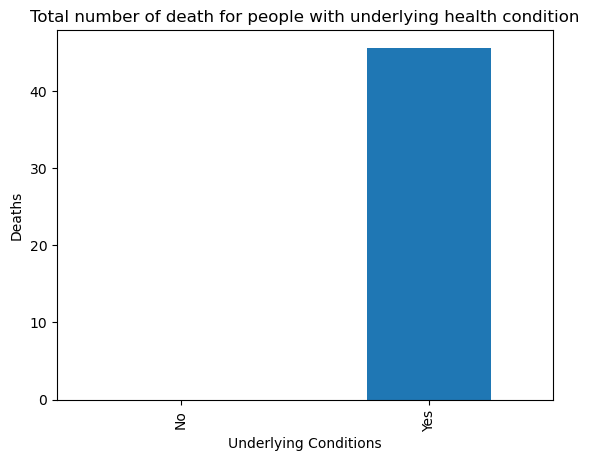

In [81]:
con_death = conditions_df.groupby(['underlying_conditions_yn'])['death_yn'].apply(lambda x : (x == 'Yes').mean() * 100)
con_death.plot.bar(title = 'Total number of death for people with underlying health condition')
plt.ylabel('Deaths')
plt.xlabel('Underlying Conditions')
plt.show()

This graph shows the relati Between  underlying  condition  and the risk of death 

- We can see underlying conditions have a huge impact on likelihood of death, with a 40% chance of dying if underlying  condition is present

- this could however be an overestimation or underestimation of the risk, considering underlying feature has about 90% missing values

## Continuous vs Categorical Plots

<AxesSubplot:title={'center':'case_positive_specimen_interval'}, xlabel='[sex]'>

<Figure size 640x480 with 0 Axes>

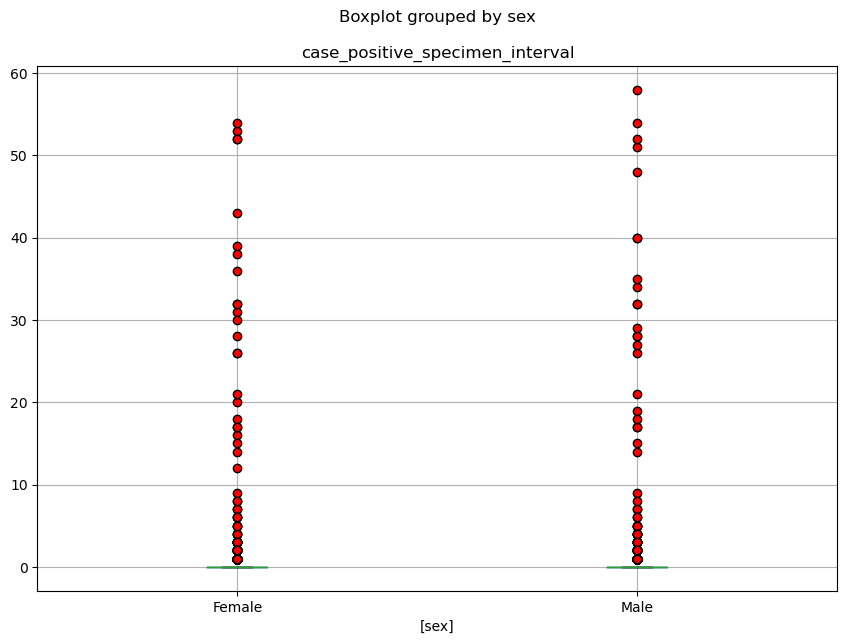

In [82]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='red', markersize=6,
                  linestyle='none')
df.boxplot(column=['case_positive_specimen_interval'], by=['sex'], flierprops=flierprops, figsize=(10,7))

The graph above compares sex differences in relation to case positive specimen (which measures Weeks between earliest date and date of first positive specimen collection).

- Based on the graph, we can see the majority of test were done few days before after the earliest date (infectious period). 

- Majority of the data between both genders are clustered between day 0 and 20, and the others outside this range tend to be clustered within the same region. 

- can conclude that the distribution between both gender is pretty even, with both gender seemingly having uniform number of days between earliest day and symptoms

- However there seem to be outliers for both sexes in the 50+ day range

<AxesSubplot:title={'center':'case_onset_interval'}, xlabel='[sex]'>

<Figure size 640x480 with 0 Axes>

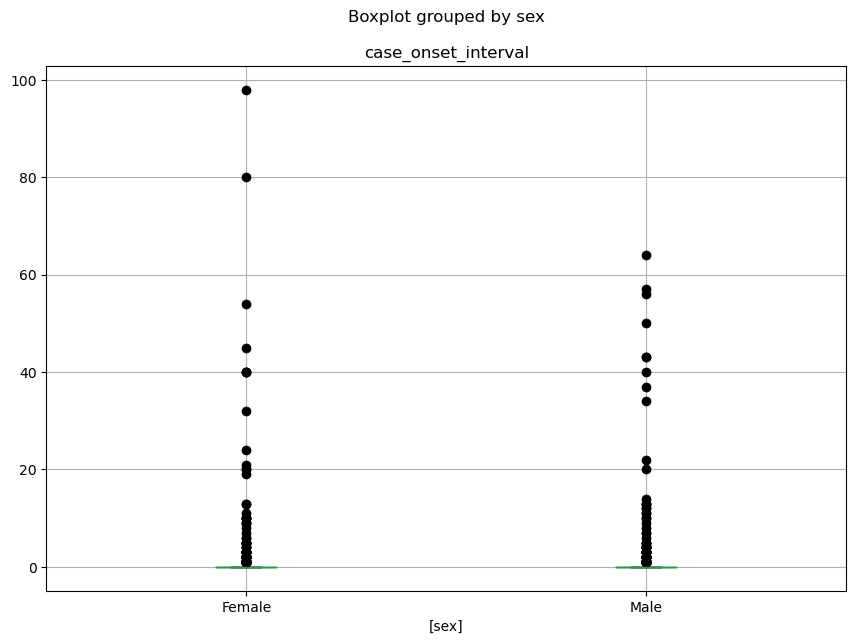

In [83]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  linestyle='none')
df.boxplot(column=['case_onset_interval'], by=['sex'], flierprops=flierprops, figsize=(10,7))

The graph above compares sex differences with case onset interval (Weeks between earliest date and date of symptom onset).

- From the graph, we can see vast majority of the case onset interval for both genders is betweeen 0 and 20 days


- However, Females seem to have two outliers with intervals of 80 and 90 days

<AxesSubplot:title={'center':'case_onset_interval'}, xlabel='[age_group]'>

<Figure size 640x480 with 0 Axes>

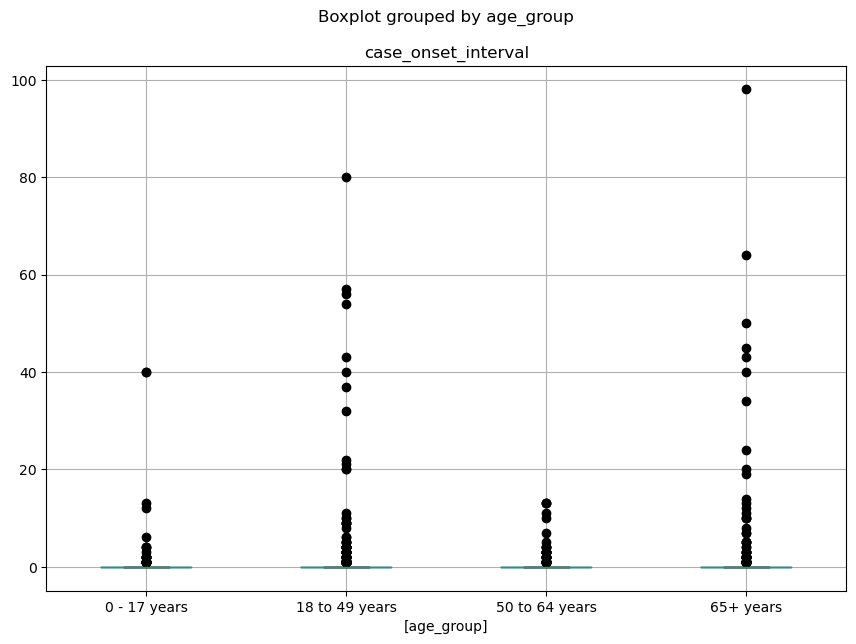

In [84]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  linestyle='none')
df.boxplot(column=['case_onset_interval'], by=['age_group'], flierprops=flierprops, figsize=(10,7))

The graaph above was plottted to seee the case onset intervals across age groups


- From observation the interval in majority of the cases was between 0-20 days


- however, there seem to be outliers in the 0-17 years, 18-49 years and 65+ years age groups

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

#### - Countinuous data:
 - We picked the two continuous features in our data set to explore their interaction
 
 - The plot indicates a correlation between case_onset_interval and case_positive_specimen_interval.
 
 - However, this doesnt give us any other additional information
 
#### - Categorical vs Categorical:
 - There seems to be a strong connection between age_group and the risk of death, hospitalization and being admitted in the ICU. The older an indicidual gets, the more likely they are to get this outcomes.
 
 - Total number of deaths per state, follow the same pattern with the total number of 65+ years cases in each state
 
 - Race and gender also seem to have an impact in total number of deaths and death ratio.
 
 - individuals admitted in the hospital and icu also have a higher risk of dying.
 
 - No relationship between symptoms and death, however it could be due to an over estimation of asymptomatic cases.
 
#### - Continuous vs categorical
 - The case positive intervals by sex, show much differences between sex.
 
 - case onset interval by sex feature however shows subtle differences between sexes, with one case in the female group having an interval of 90+ days
 
- case_onset_interval by age group, doesn't follow a clear pattern

## Number Four

#### Feature 1

The age_sex feature was created by grouping age and sex. This feature was created to observe how various risk_outcome pairs might vary across age and sex.

In [85]:
# Creating a feature called age_sex by combining age group and sex features
df['age_sex'] = df['age_group'].astype(str).str.cat(df['sex'], sep='_')

# Print the first few rows of the DataFrame to verify the new feature
df.head(5)


,case_month,res_state,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,age_sex
0,2022-01,NY,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female
1,2021-12,FL,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN,65+ years_Female
2,2020-08,FL,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female
3,2020-05,FL,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN,65+ years_Male
4,2021-09,NC,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Male


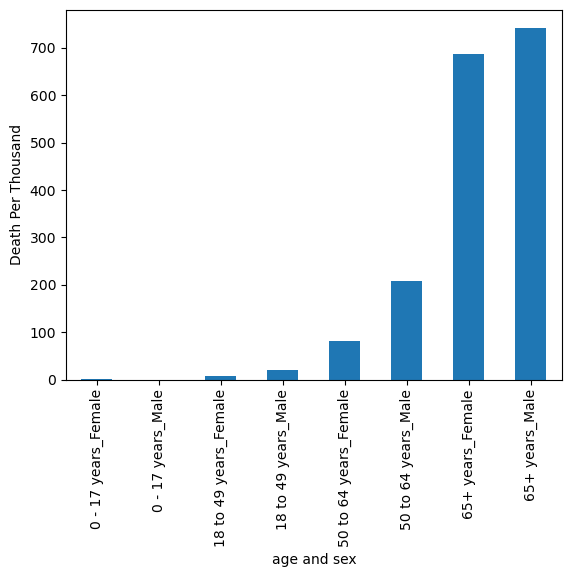

In [86]:
death_age_sex = df.groupby(['age_sex'])['death_yn'].apply(lambda x: (x == 'Yes').mean()*1000)

death_age_sex.plot.bar("Death Per Thousand by age and sex")
plt.ylabel("Death Per Thousand")
plt.xlabel("age and sex")
plt.show()

The graph above shows the relationship between age_sex and death rate per 1000 people

- we can observe that as previously seen, individuals above 65 have the highest mortality rate

- Across all age_groups, males also seem to have a much larger mortality rate when compared to feemales

#### Feature 2

A new feature was created to see the interactions between ethnicity and race 

- This was done to see how the interaction between this two features could impact possible outcomes like mortality

In [87]:
#Merging ethnicity and race to form a new feature
df['ethnicity_race'] = df['ethnicity'].astype(str).str.cat(df['race'], sep='_').dropna()

#Returns first 5 rows including new features
df.head(5)


,case_month,res_state,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,age_sex,ethnicity_race
0,2022-01,NY,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Hispanic/Latino_White
1,2021-12,FL,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White
2,2020-08,FL,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White
3,2020-05,FL,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White
4,2021-09,NC,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White


In [88]:
#replacing nan values with missing
df['ethnicity_race'].replace(['nan_American Indian/Alaska Native', 'nan_Asian', 'nan_Black', 'nan_Multiple/Other', 'nan_Native Hawaiian/Other Pacific Islander', 'nan_White'], 'Missing', inplace = True)

ethnicity_race
Hispanic/Latino_American Indian/Alaska Native                    0
Hispanic/Latino_Black                                            0
Hispanic/Latino_Multiple/Other                                   5
Hispanic/Latino_White                                          664
Missing                                                          8
Non-Hispanic/Latino_American Indian/Alaska Native               13
Non-Hispanic/Latino_Asian                                      134
Non-Hispanic/Latino_Black                                      513
Non-Hispanic/Latino_Multiple/Other                               3
Non-Hispanic/Latino_Native Hawaiian/Other Pacific Islander       0
Non-Hispanic/Latino_White                                     3442
Name: death_yn, dtype: int64


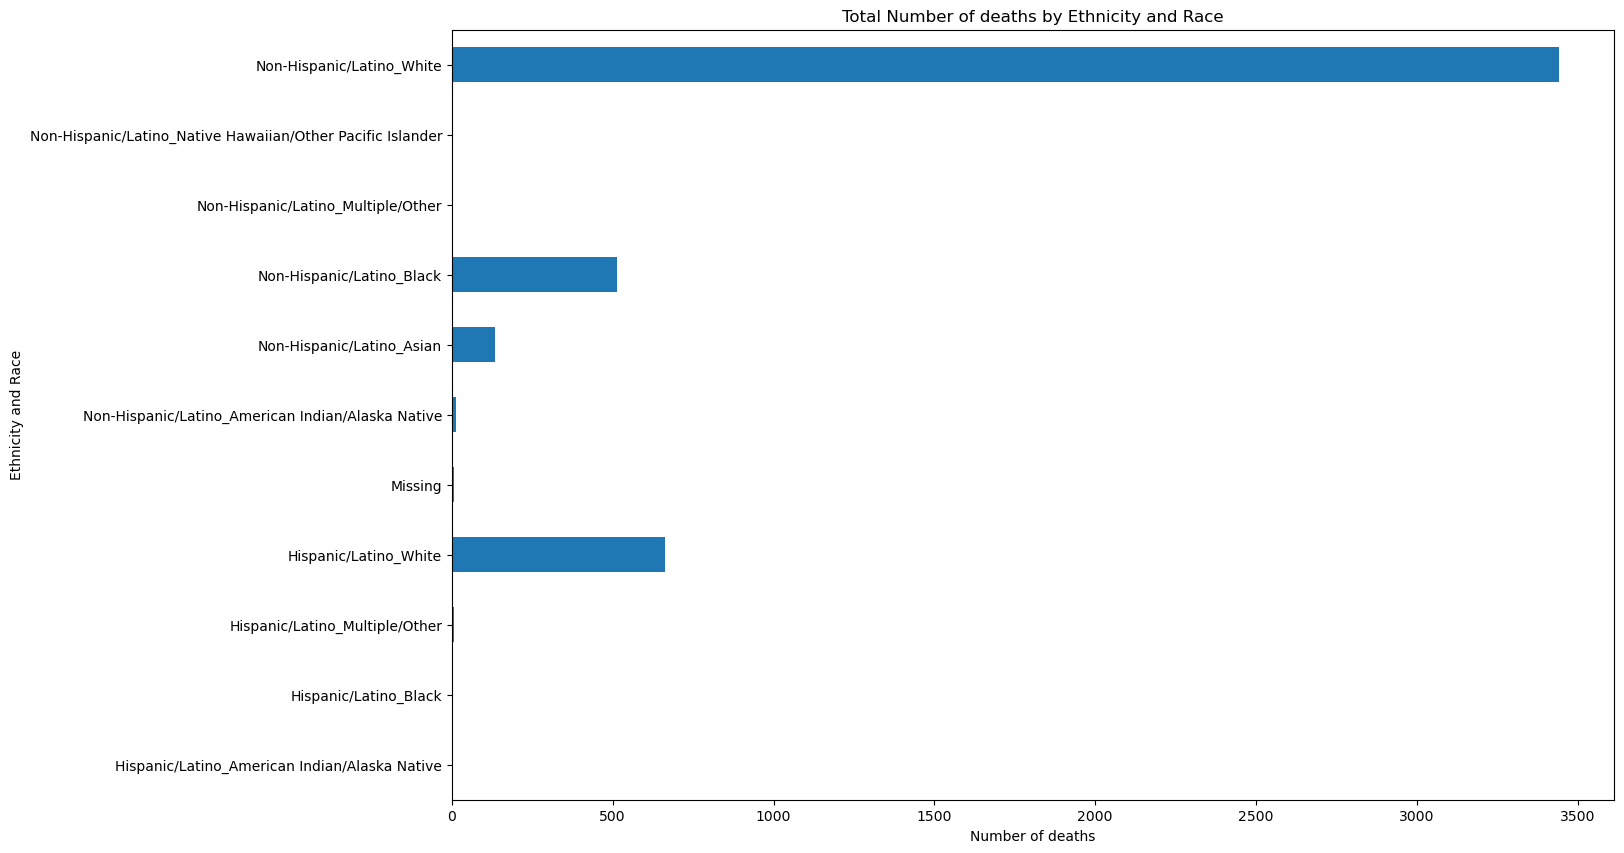

In [89]:
#grouping ethnicity by total number of deaths
ethnic_race_death = df.groupby(['ethnicity_race'])['death_yn'].apply(lambda x: (x=='Yes').sum())
print(ethnic_race_death)
#plotting graph to see the total number of deaths by ethnicity
ethnic_race_death.plot.barh(title='Total Number of deaths by Ethnicity and Race', figsize=(15,10))
plt.ylabel('Ethnicity and Race')
plt.xlabel('Number of deaths')
plt.show()


The graph above is showing the total number of death by ethnicity and race.

- On observation, we can see that Nonhispanic whites, suffered the most deaths, with a total number of 3500 deaths in this category


- This was followed by Hispanic/Latino Whites, while Asians seems to have the lowest number of deaths.


- However, I would like to observe if they have the highest death ratio as well, because since they form the overwhelming majority of the dat populatin, they are more likely to suffer the most deaths (Total).

ethnicity_race
Hispanic/Latino_American Indian/Alaska Native                    0.000000
Hispanic/Latino_Black                                            0.000000
Hispanic/Latino_Multiple/Other                                1000.000000
Hispanic/Latino_White                                          381.390006
Missing                                                         35.874439
Non-Hispanic/Latino_American Indian/Alaska Native              171.052632
Non-Hispanic/Latino_Asian                                      310.185185
Non-Hispanic/Latino_Black                                      248.185776
Non-Hispanic/Latino_Multiple/Other                              23.437500
Non-Hispanic/Latino_Native Hawaiian/Other Pacific Islander       0.000000
Non-Hispanic/Latino_White                                      264.484401
Name: death_yn, dtype: float64


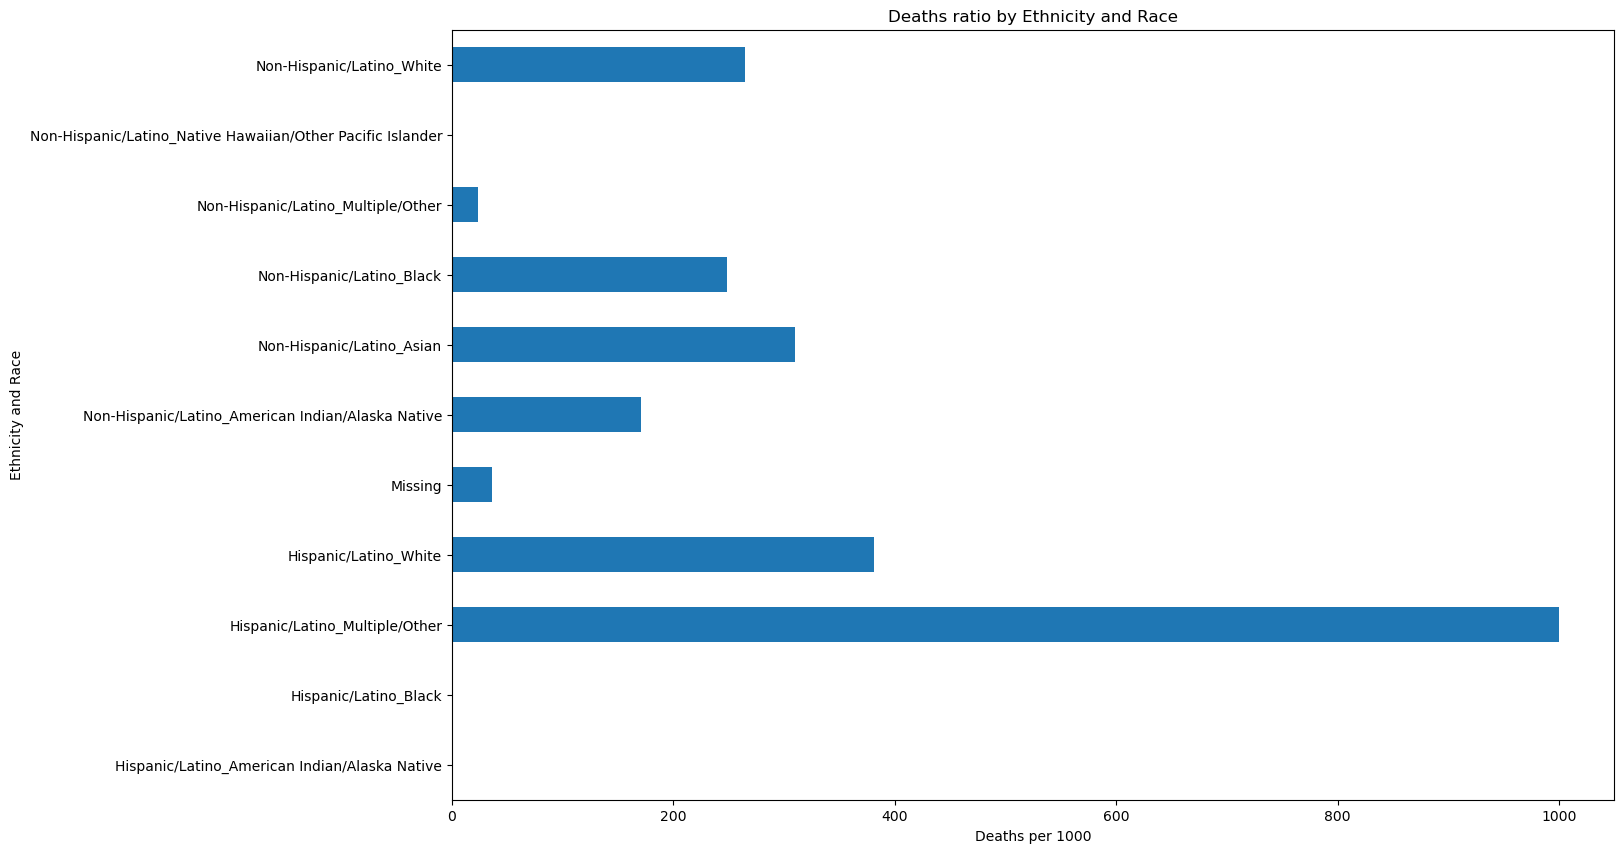

In [90]:
#grouping ethnicity by number of deaths per 1000 people
ethnic_race_death_ratio = df.groupby(['ethnicity_race'])['death_yn'].apply(lambda x: (x=='Yes').mean() * 1000).dropna()
print(ethnic_race_death_ratio)
##plotting graph to see the death rate per people 1000 by ethnicity
ethnic_race_death_ratio.plot.barh(title='Deaths ratio by Ethnicity and Race', figsize=(15,10))
plt.ylabel('Ethnicity and Race')
plt.xlabel('Deaths per 1000')
plt.show()


Death ratio by ethnicity and race

- The graph regarding death ratios as imagined varies from that counting total number of deaths across ethnicity.


- Minority groups according to the graph above seem to have higher death rates, for instance the death ratio for Hispanic/Latino Multiple/Other is over 800 in every 1000 people.

#### Feature 3

state_mortality_ratio: Measures mortality rate in each state.
The new feature was created to observe the spread of mortality rates across state. There might be state specific differences in the mortality rates, in relation to age, sex etc.

In [91]:
#Creating new feature by getting the death rate in each state
df['state_mortality_rate'] = df.groupby(['res_state'])['death_yn'].transform(lambda x: round((x == 'Yes').mean() * 100, 2))


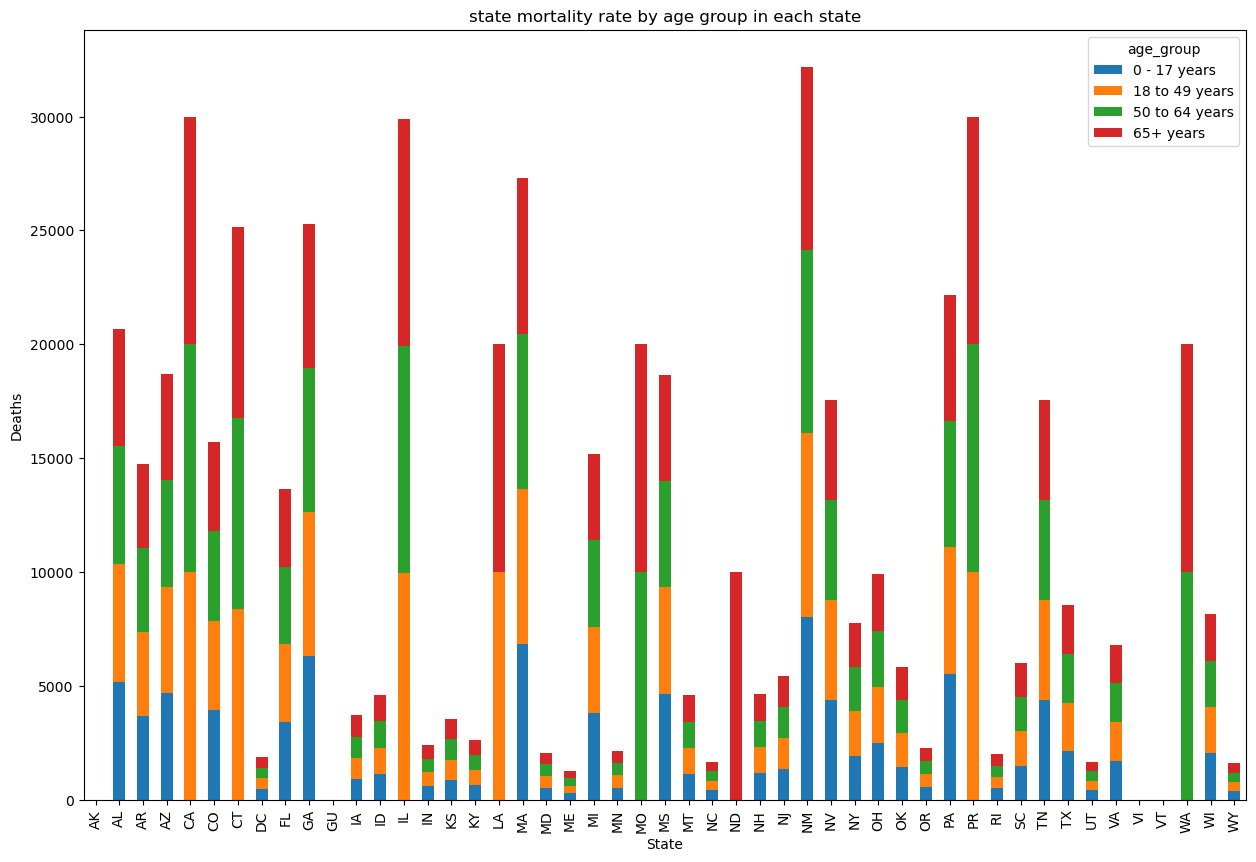

In [92]:

df['state_mortality_rate'] = df.groupby(['res_state'])['death_yn'].transform(lambda x: round((x == 'Yes').mean() * 100, 2))


state_death_age = df.groupby(['res_state', 'age_group'])['state_mortality_rate'].mean() * 100


state_death_age.unstack().plot.bar(stacked=True, figsize=(15,10), title='state mortality rate by age group in each state')
plt.ylabel('Deaths')
plt.xlabel('State')
plt.show()

The graph above shows the mortality rate by age group across the state

#### Feature 4

This new feature calculates the hospitalization rate across states.
- The main reason behind the creation of this new feature is to see if hospitalization rate across states is correlated to death rates across state

- The feature can also be used to examine the impact of hospitaization on other outcomes

In [93]:
df['state_hospitalization_rate'] = df.groupby(['res_state'])['hosp_yn'].transform(lambda x: round((x == 'Yes').mean() * 100, 2))

(array([0.5, 1.5]),
 [Text(0.5, 0, 'state_hospitalization_rate'),
  Text(1.5, 0, 'state_mortality_rate')])

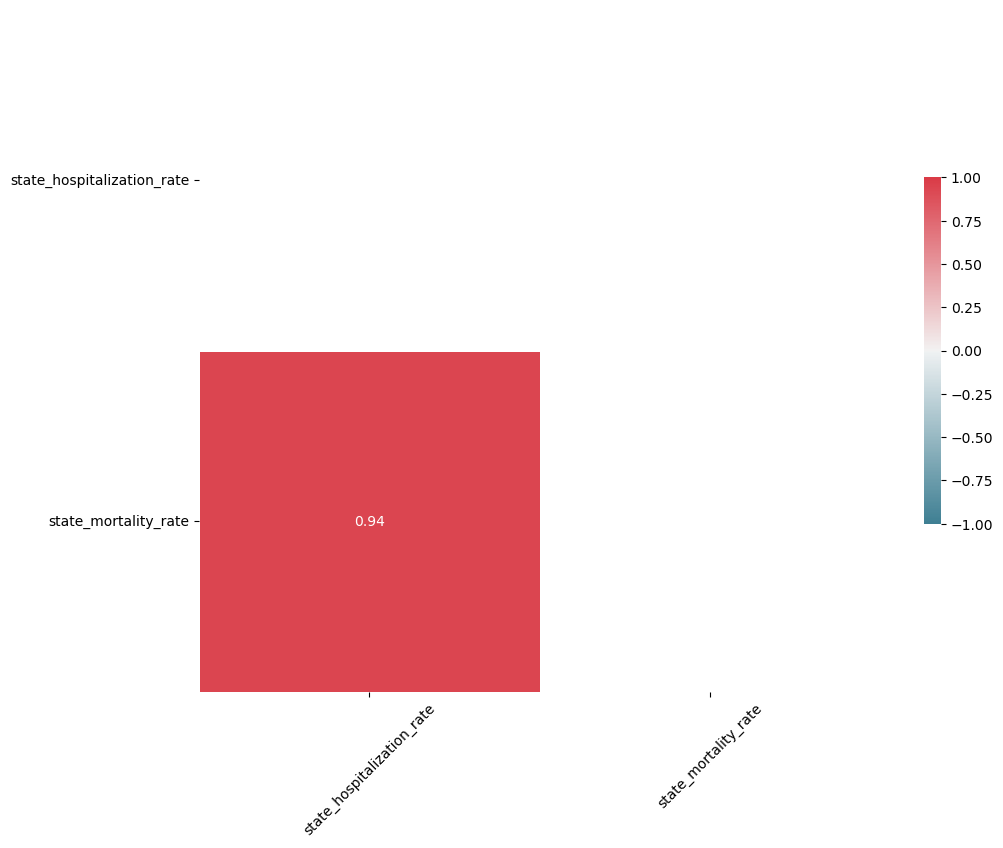

In [94]:
state_ratios = ['state_hospitalization_rate', 'state_mortality_rate']
corr = df[state_ratios].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='state_mortality_rate', ylabel='state_hospitalization_rate'>

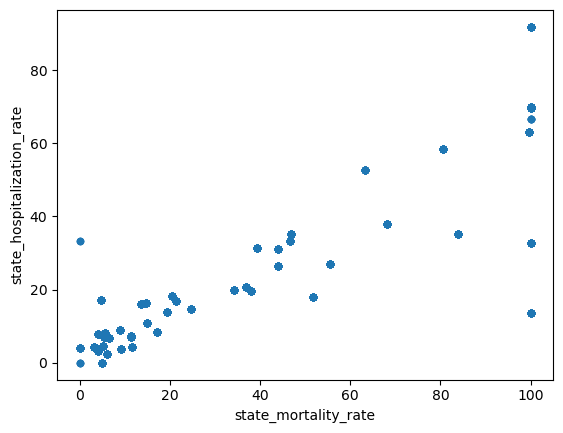

In [95]:
df.plot(kind='scatter', x='state_mortality_rate', y='state_hospitalization_rate')

The graph above was plotted to see the correlation between state hospital admission and state mortality rates.

- We can see taht the two features seem to be strongly correlated (0.91), with an increase in hospitalization leading to an increase in state mortality rates

#### Feature 5

This new feature was created to develop a risk score, to see how likely an individual is to die, if they have certain features identified with an associated risk of mortality. This features are hospitalization, admitted in an icu, underlying health condition, and if they are over 65.

- individuals with none of this are considered low risk

- individuals with 1 of this are considered medium risk

- individuals with 2 are considered high risk

- individuals with 3 are considered to have very high risk

- individuals with 4 considered to have an extreme risk

In [96]:
df['risk_score'] = (df['hosp_yn'] == 'Yes').astype(int) + (df['underlying_conditions_yn'] == 'Yes').astype(int) + (df['icu_yn'] == 'Yes').astype(int)  + (df['age_group']=='65+ years').astype(int)

df['risk_score'].replace([0,1,2, 3, 4], ['low risk', 'medium risk', 'high risk', 'very high risk', 'extreme_risk'], inplace = True)
    

In [97]:
df.head(5)

,case_month,res_state,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,age_sex,ethnicity_race,state_mortality_rate,state_hospitalization_rate,risk_score
0,2022-01,NY,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Hispanic/Latino_White,19.46,13.97,high risk
1,2021-12,FL,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White,34.11,19.85,medium risk
2,2020-08,FL,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White,34.11,19.85,high risk
3,2020-05,FL,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White,34.11,19.85,medium risk
4,2021-09,NC,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White,4.15,3.19,high risk


In [98]:
df['risk_score'].value_counts()

low risk          12408
medium risk        4317
high risk          2460
very high risk      669
extreme_risk        146
Name: risk_score, dtype: int64

mortality_riskscore 


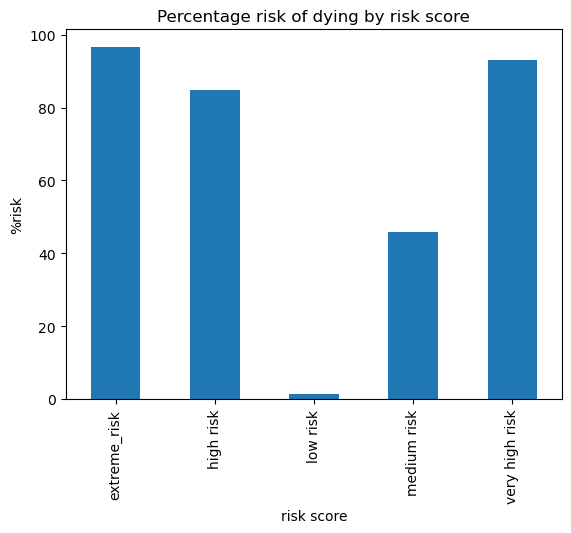

In [99]:
mortality_riskscore = df.groupby(['risk_score'])['death_yn'].apply(lambda x: (x=='Yes').mean() * 100)

print('mortality_riskscore ')
mortality_riskscore.plot.bar(title='Percentage risk of dying by risk score')
plt.ylabel('%risk')
plt.xlabel('risk score')
plt.show()

The graph above was plotted to show risk of dying by risk score

- as expectedd individuals with an extreme risk score have a very high risk of death when compared to others.


- infact having atleast risk 1 of the factors in the features used to develop the risk score can increase the chances of death to covid by over 40 %


- individuals with none of this features (i.e. low risk only have less than 5% chance of dying from covid.

In [101]:
df

,case_month,res_state,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,age_sex,ethnicity_race,state_mortality_rate,state_hospitalization_rate,risk_score
0,2022-01,NY,65+ years,Female,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Hispanic/Latino_White,19.46,13.97,high risk
1,2021-12,FL,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White,34.11,19.85,medium risk
2,2020-08,FL,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Female,Non-Hispanic/Latino_White,34.11,19.85,high risk
3,2020-05,FL,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White,34.11,19.85,medium risk
4,2021-09,NC,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN,65+ years_Male,Non-Hispanic/Latino_White,4.15,3.19,high risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-07,OR,18 to 49 years,Female,NaN,NaN,NaN,0.0,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,18 to 49 years_Female,NaN,5.65,8.26,low risk
19996,2021-12,NY,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,18 to 49 years_Female,Non-Hispanic/Latino_White,19.46,13.97,low risk
19997,2022-05,NC,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,50 to 64 years_Female,Non-Hispanic/Latino_White,4.15,3.19,low risk
19998,2022-04,ME,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Asymptomatic,No,Missing,No,NaN,18 to 49 years_Male,Non-Hispanic/Latino_White,3.14,4.40,low risk


### To finish - Print data types, descriptive tables, save to csv

In [102]:
df.dtypes

case_month                         category
res_state                          category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
age_sex                              object
ethnicity_race                       object
state_mortality_rate                float64
state_hospitalization_rate          float64
risk_score                           object
dtype: object

In [103]:
#Converting "object" stypes to category
for columns in df:
    if df[columns].dtypes == 'object':
        df[columns] = df[columns].astype('category')

In [104]:
# Discriptive statistics for continuous Features
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,10456.0,0.269032,2.296530,0.0,0.00,0.00,0.00,58.00
case_onset_interval,8567.0,0.206140,2.519871,0.0,0.00,0.00,0.00,98.00
state_mortality_rate,20000.0,24.998499,24.831451,0.0,6.01,19.46,34.11,100.00
state_hospitalization_rate,20000.0,17.114547,15.655032,0.0,7.00,14.62,19.85,91.84


In [105]:
# Discriptive statistics for category features
category_columns = df.select_dtypes(['category']).columns
df[category_columns].describe().T

,count,unique,top,freq
case_month,20000,34,2022-01,2649
res_state,20000,49,NY,2204
age_group,19844,4,18 to 49 years,7888
sex,19595,2,Female,10227
race,17717,6,White,14905
ethnicity,17494,2,Non-Hispanic/Latino,15721
current_status,20000,2,Laboratory-confirmed case,17087
symptom_status,20000,3,Missing,10430
hosp_yn,20000,3,No,9816
icu_yn,20000,3,Missing,18260


In [106]:
# # Write the cleaned dataframe to a csv file
df.to_csv('Final_CDC_Cleaned_data.csv', index=False)